In [1]:
%load_ext autoreload
%autoreload 2

---

## Config

In [2]:
import sys

In [3]:
project_dir = '/home/pmonteagudo/workspace/silencing_project'
if project_dir not in sys.path: 
    sys.path.append(project_dir)
from config_analysis import *

In [4]:
from Util import to_log2_tpm
from Util import long_header

In [5]:
#simulated_data = True # only FigureS1-A_wt works
simulated_data = False

<font color='red'> **Atention!** It's possible to use other directories than the default (e.g. `wo_nh-norm results`) </font>

In [6]:
#rna_dir = '/gcm-lfs1/pablo/data/rna_silencing/results_wo_nh-norm/xp_data/RNA'
#chip_dir = '/gcm-lfs1/pablo/data/rna_silencing/results_wo_nh-norm/xp_data/ChIP'

- Result **directories**

In [7]:
rna_dir

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/RNA'

In [8]:
chip_dir

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP'

In [9]:
plots_dir

'/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21'

- Gene Expression files **RNA** and **ChIP**

In [10]:
if not simulated_data:
    rna_tpm_file = os.path.join(rna_dir, 'rna_merged_tpm.csv')
    #rna_tpm_file = os.path.join(rna_dir, 'rna_merged_filtered_tpm.csv')
    
    chip_tpm_file = os.path.join(chip_dir, 'chip_merged_tpm.csv')
    #chip_tpm_file = os.path.join(chip_dir, 'chip_merged_filtered_tpm.csv')
    
else:
    # Attention! 
    # => Files needs to be manually renamed with 'chip' or 'rna' prefix after re-running snakemake!
    
    rna_tpm_file = '/gcm-lfs1/pablo/data/rna_silencing/results/simulated-data/xp_data/rna_pombe_tpm_matrix.csv'
    #rna_tpm_file = '/gcm-lfs1/pablo/data/rna_silencing/results/simulated-data/xp_data/rna_pombe_gene_count_matrix.csv'
    
    chip_tpm_file = '/gcm-lfs1/pablo/data/rna_silencing/results/simulated-data/xp_data/chip_pombe_tpm_matrix.csv'
    #chip_tpm_file = '/gcm-lfs1/pablo/data/rna_silencing/results/simulated-data/xp_data/chip_pombe_gene_count_matrix.csv'

print('RNA (TPM) file:', rna_tpm_file)
print('ChIP (TPM) file:', chip_tpm_file)

RNA (TPM) file: /gcm-lfs1/pablo/data/rna_silencing/results/xp_data/RNA/rna_merged_tpm.csv
ChIP (TPM) file: /gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP/chip_merged_tpm.csv


---------

# Create Scatter Plots: **Gene Expression**

---------

### <font color='blue'> **Attention!** In this Notebook we are not analyzing **ratios** but **absolute expression** </font>

### <font color='blue'> **=> Even though, Counts used in this analysis should NOT be normalized by NH.** </font>
### <font color='blue'> => The idea is to sum up all contributions to *any* of the `dg/dh` </font> <br>

This Notebook is used to generate the following **Scatter Plots**:
- **Figure-S1**: *Scatter Plots*
    - Pol II RIP vs Pol II ChIP - <del>**FigureS1-A**</del> <font color='red'> **Figure1-C** </font>
    - Pol II RIP data vs pA RNA - <del>**FigureS1-B**</del> <font color='red'> **Figure1-E** </font>
    
that gives us comparable information to the previously defined **ratios**:
- ~ Pol II ChIP / Pol II RIP = Transcript Efficiency${^{-1}}$
- ~ pA RNA / Pol II RIP = RNA Stability

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#from Viz import scatter_plot
from viz_strands import scatter_plot

In [13]:
n_repeats_dict = {'dh1a':16, 'dh1b':16, 
                  'dg1a':11, 'dg1b':11}

In [14]:
def scale_repeats(row, n_repeats_dict):
    #import pdb;pdb.set_trace()
    #try:
    #    return n_repeats_dict[row['gene_id']] * row[row.index != 'gene_id']
    #except:
    #    return row[row.index != 'gene_id']
    if (row['gene_id'] in n_repeats_dict.keys()):    
        return n_repeats_dict[row['gene_id']] * row[row.index != 'gene_id']
    else:
        return row[row.index != 'gene_id']

---

# **I.** **Pol II RIP data** vs **pA RNA**: `~RNA Stability`
- **WT**
- **Caf1d**

---

- **Import** RNA data (**pA RNA** and **Pol II RIP**): `rna_merged_tpm.csv`

In [15]:
rna_tpm_file

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/RNA/rna_merged_tpm.csv'

In [16]:
df = pd.read_csv(rna_tpm_file, sep='\t')
df.head()

gene_id gene_name  length    type category bio_type  \
0       FP565355_region_1..2120       NaN    2120  region   repeat   region   
1  FP565355_region_15417..15473       NaN      57  region   repeat   region   
2  FP565355_region_15474..15608       NaN     135  region   repeat   region   
3  FP565355_region_15609..16735       NaN    1127  region   repeat   region   
4  FP565355_region_16736..16794       NaN      59  region   repeat   region   

   1022_S2-RIP  1022_pA-RNA  1168_S2-RIP  1168_pA-RNA  ...  638_S2-RIP  \
0    13.047263     8.610194     1.551187     0.812477  ...    2.628246   
1     0.000000     0.000000     0.000000     0.000000  ...    0.000000   
2     4.362461     5.435505     6.791771     1.182042  ...    5.225105   
3    20.357270    57.937164     8.811443    83.772135  ...    4.224988   
4     0.000000     0.000000     0.000000     0.000000  ...    0.000000   

   638_pA-RNA  638_total-RNA  80_S2-RIP  80_pA-RNA  80_total-RNA  WT_S2-RIP  \
0    2.906437       5.585458   2.941590   1.800442      3.257867   2.451086   
1    0.000000       0.000000   0.000000   0.000000      0.000000   0.000000   
2   10.515522       6.788815   4.632683   1.165227      0.000000  29.076151   
3    6.463253       4.565533  18.242957  37.932886     26.830832   0.999979   
4    0.000000       0.000000   0.000000   0.000000      0.000000   0.000000   

   WT_S5-RIP  WT_pA-RNA  WT_total-RNA  
0   0.000000   0.719070      1.761184  
1   0.000000   0.000000      0.000000  
2  55.013025   6.204396      0.000000  
3   0.000000   8.761472     25.896352  
4   0.000000   0.000000      0.000000  

[5 rows x 39 columns]

In [17]:
df.shape

(7021, 39)

- Adjust for **number of copies** of each repeat:

In [18]:
#df[['WT_S2-RIP', 'WT_pA-RNA']] = df[['gene_id', 'WT_S2-RIP', 'WT_pA-RNA']].apply(lambda x: scale_repeats(x, n_repeats_dict), axis=1)

In [19]:
## test if one sample is biasing whole analysis.
##df = pd.read_csv(os.path.join(rna_dir, 'rna_pombe_tpm_matrix.csv'), sep='\t')
#df.loc[df['gene_id'].str.contains('dg|dh|SPAC212.11|SPAC212.10'), df.columns.str.contains('WT|gene_id|gene_name')]

- Get **sample columns** for filtering `NA`s properly:

In [20]:
sample_cols = [ss for ss in df.columns.tolist() if ss not in long_header]
len(sample_cols)
#sample_cols

33

In [21]:
#df[sample_cols].describe()
assert all(np.isclose(df[sample_cols].sum(), 10**6)) # check TPM normalization

#### <font color='red'> Deal with **NAs**: *Drop* or *fill with zeros?* </font>
- <font color='red'> `NaN's` originated from zero counts: **fill with zeros** </font>
- <font color='red'> In `rna_merged_tpm.csv`, it should already have been taken care of! </font> 
    - <font color='red'> **NOT for `simulated-data`!** </font> 

In [22]:
# (NOT USED)
# => NAs originated from zero counts: fill with zeros
#df = df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#df = df.fillna({kk:0 for kk in sample_cols})

# (NOT USED) drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
#df = df.dropna(subset = sample_cols) 
#df = df.dropna(0)

In [23]:
# no surprises!
# => there should not be NAs in sample columns (with counts)
assert not df[sample_cols].isnull().values.any()

- **Log-transform** and filter for **Heterochromatic** and **Protein coding** genes

In [24]:
# log transformed counts will be used to visualize scatterplot
# => compute log(1+x) to avoid issues with zero counts
#df = to_log2_tpm(df, gene_id_col='gene_id') # default shift=1
df = to_log2_tpm(df, gene_id_col='gene_id', shift=1) # default shift=1

# select mutants: [wt, caf1d]
#df = df[['gene-name', 'type', 'category', 'WT_RIP', 'WT_RNA']]
df = df[['gene_id', 'gene_name', 'type', 'category', 'bio_type', 'WT_S2-RIP', 'WT_pA-RNA', '510_S2-RIP', '510_pA-RNA']]

# Keep only Heterochromatic genes and  protein coding genes
#df = df[(df['type'] == 'gene') | (df['category'] == 'repeat')]
df = df[(df['bio_type'] == 'mRNA') | (df['category'] == 'repeat')]

df.head()

gene_id gene_name    type category bio_type  \
0       FP565355_region_1..2120       NaN  region   repeat   region   
1  FP565355_region_15417..15473       NaN  region   repeat   region   
2  FP565355_region_15474..15608       NaN  region   repeat   region   
3  FP565355_region_15609..16735       NaN  region   repeat   region   
4  FP565355_region_16736..16794       NaN  region   repeat   region   

   WT_S2-RIP  WT_pA-RNA  510_S2-RIP  510_pA-RNA  
0   1.787050   0.781628    2.615811    2.250754  
1   0.000000   0.000000    0.000000    0.000000  
2   4.910548   2.848877    2.237406    2.108835  
3   0.999985   3.287099    3.871185    5.844738  
4   0.000000   0.000000    0.000000    0.000000

In [25]:
df.shape

(5159, 9)

## **WT** - Pol II RIP data vs pA RNA - <del>**FigureS1-B_wt**</del> <font color='red'> **Figure1-E_wt** </font>

- **Supplemental Figure S1**: Scatter plots 

    - **(B)** pA RNA-seq (steady state RNA) data plotted over S2P-Pol II RIP seq data (nascent RNA), showing RNA stability in wild type cells. 
    - Line = regression line;  TPM = transcripts per million. Average of at least two independent samples is shown. 

#### <font color='red'> Deal with **zeros**: *Drop*? </font>

In [26]:
wt_df = df

# (NOT USED) in most plots we get rid of nan's, here we set them to zero
#wt_df = df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#wt_df = df.fillna({'WT_S2-RIP':0, 'WT_pA-RNA':0})

# drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
# => why not fillna(0) like before, in GXP_BoxPlots.ipynb
# wt_df = df.dropna(subset = ['WT_S2-RIP', 'WT_pA-RNA'])
# wt_df.head()

In [27]:
wt_df.shape

(5159, 9)

In [28]:
#wt_df.loc[wt_df['gene_id'].str.contains('dg|dh|SPAC212.11|SPAC212.10'), wt_df.columns.str.contains('WT|gene_id|gene_name')]

- Plot gene cloud: **Pol II RIP data** vs **pA RNA** (~RNA Stability)

In [29]:
#fig_dir = os.path.join(plots_dir, 'Figure-S1')
fig_dir = os.path.join(plots_dir, 'Figure1')

if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

In [30]:
out_dir = plots_dir
out_dir = fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure1/Figure1-E_wt.png


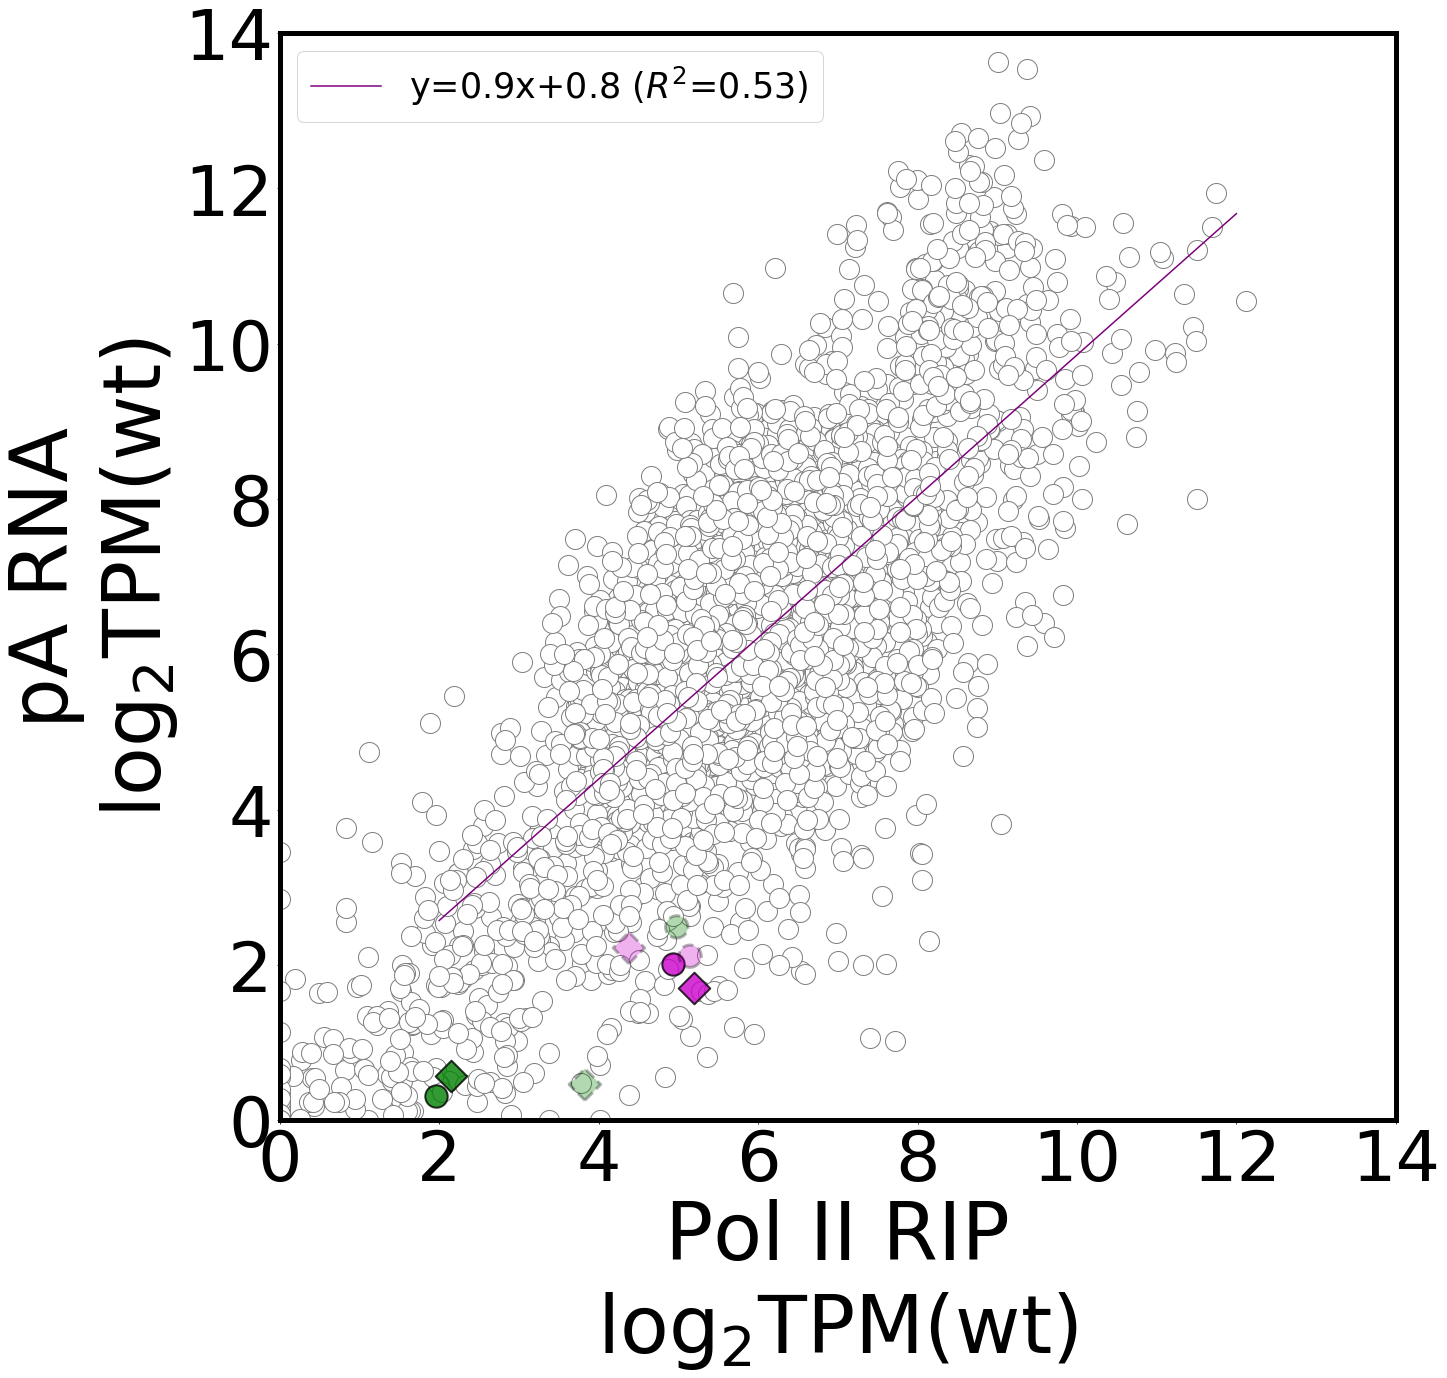

In [31]:
plot_name = 'Figure1-E_wt.png'

# path and plot
#out_path = os.path.join(out_dir, 'FigureS1-B_wt.png')
out_path = os.path.join(out_dir, plot_name)
print(out_path)

scatter_plot(
    wt_df, 'WT_S2-RIP', 'WT_pA-RNA',
    out_dir,
    plot_name,
    regressor=True,
    fit_intercept=True,
    #fit_intercept=False,
    annotate=False,
    #annotate=True,
    #include_mat_locus_vis = include_mat_locus_vis,
    #include_mat_locus_vis = True,
    include_mat_locus_vis = False,
    #include_rest_heterochromatic_repeats=True,
    include_rest_heterochromatic_repeats=False,             
    xlabel='Pol II RIP\n$\mathrm{log_2TPM(wt)}$',
    ylabel='pA RNA\n$\mathrm{log_2TPM(wt)}$', 
    xlim=14, ylim=14,
    #ribo_color='dimgray'
)

## **Caf1d** - Pol II RIP data vs pA RNA - <del>**FigureS1-B_caf1d**</del> <font color='red'> **Figure1-E_caf1d** </font>

- **Supplemental Figure S1**: Scatter plots 

    - **(B)** pA RNA-seq (steady state RNA) data plotted over S2P-Pol II RIP seq data (nascent RNA), showing RNA stability in wild type cells. 
    - Line = regression line;  TPM = transcripts per million. Average of at least two independent samples is shown. 

#### <font color='red'> Deal with **zeros**: *Drop*? </font>

In [32]:
caf1d_df = df

# (NOT USED) in most plots we get rid of nan's, here we set them to zero
#caf1d_df = df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#caf1d_df = df.fillna({'510_S2-RIP':0, '510_pA-RNA':0})

# drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
# => why not fillna(0) like before, in GXP_BoxPlots.ipynb
# caf1d_df = df.dropna(subset = ['510_S2-RIP', '510_pA-RNA'])
# caf1d_df.head()

In [33]:
caf1d_df.shape

(5159, 9)

In [34]:
#caf1d_df.loc[caf1d_df['gene_id'].str.contains('dg|dh|SPAC212.11|SPAC212.10'), caf1d_df.columns.str.contains('WT|gene_id|gene_name')]

- Plot gene cloud: **Pol II RIP data** vs **pA RNA** (~RNA Stability)

In [35]:
#fig_dir = os.path.join(plots_dir, 'Figure-S1')
fig_dir = os.path.join(plots_dir, 'Figure1')

if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

In [36]:
out_dir = plots_dir
out_dir = fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure1/Figure1-E_caf1d.png


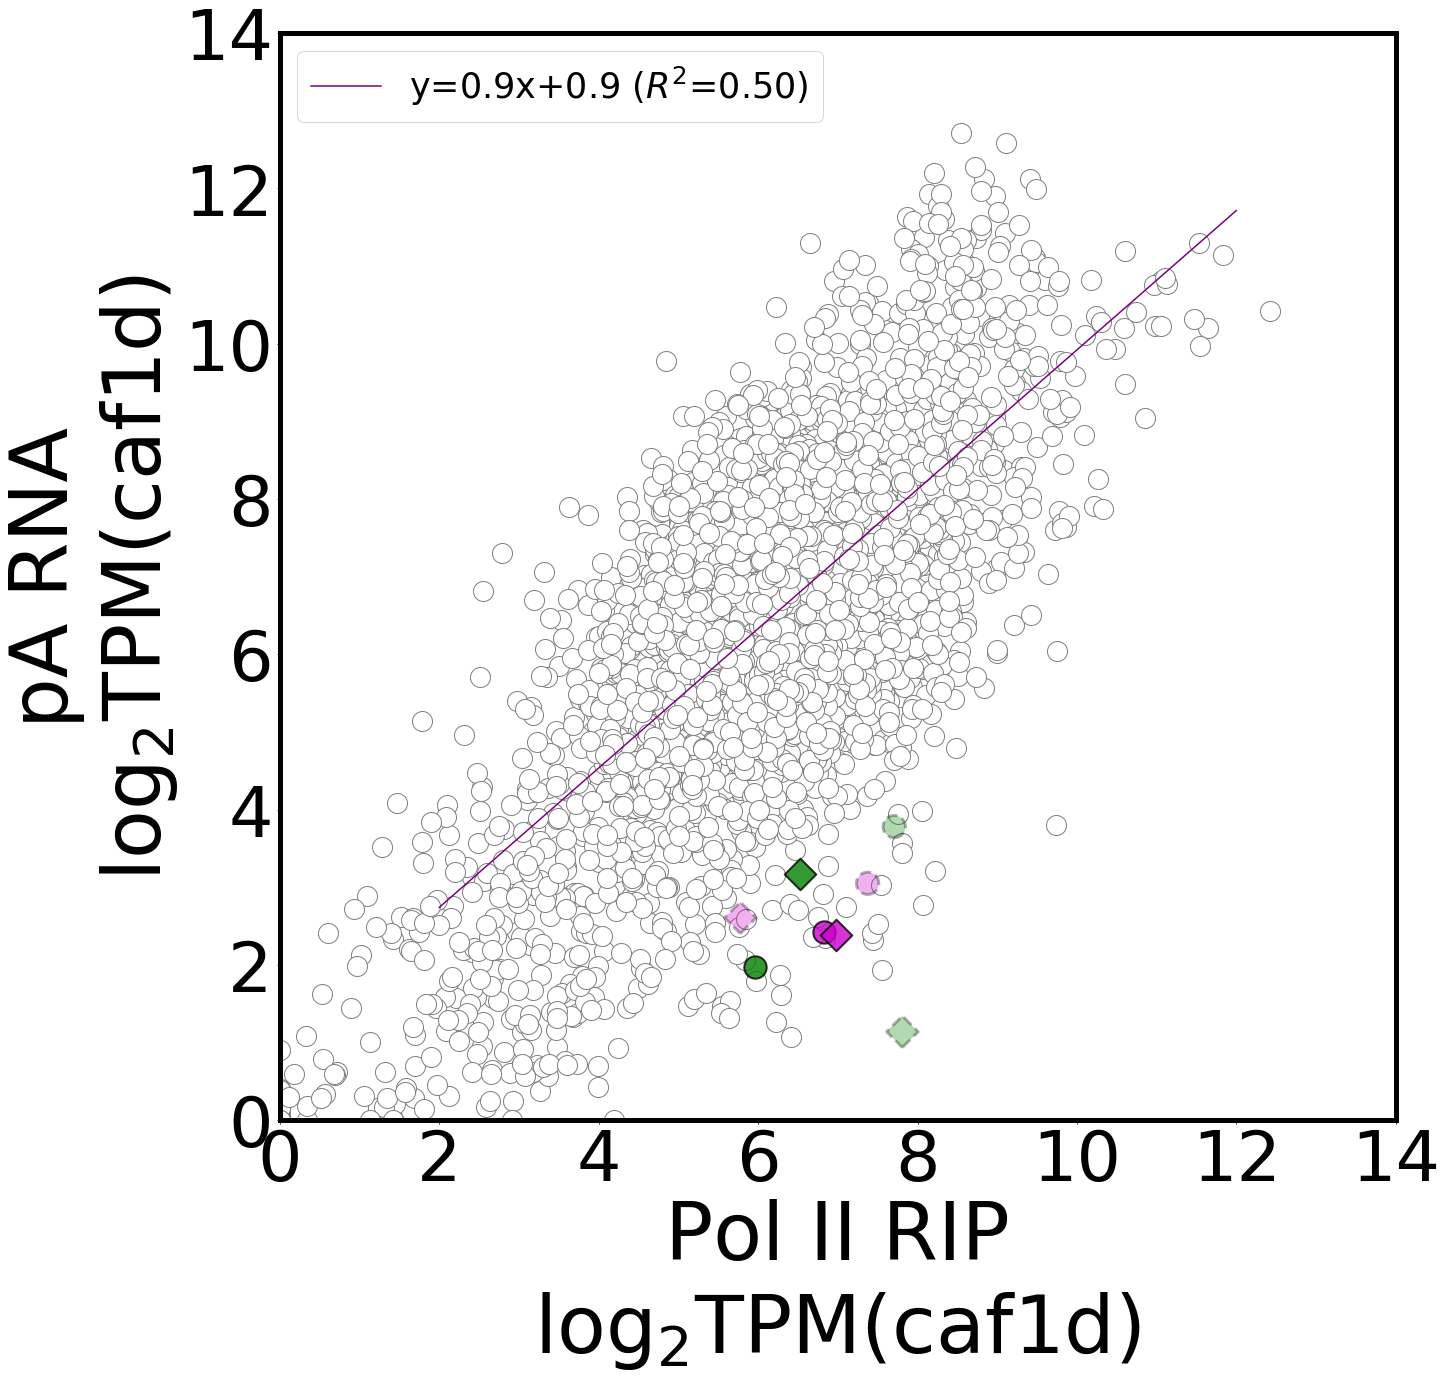

In [37]:
plot_name = 'Figure1-E_caf1d.png'

# path and plot
#out_path = os.path.join(out_dir, 'FigureS1-B_caf1d.png')
out_path = os.path.join(out_dir, plot_name)
print(out_path)

scatter_plot(
    caf1d_df, '510_S2-RIP', '510_pA-RNA',
    out_dir,
    plot_name,
    regressor=True,
    fit_intercept=True,
    #fit_intercept=False,
    annotate=False,
    #annotate=True,
    #include_mat_locus_vis = include_mat_locus_vis,
    #include_mat_locus_vis = True,
    include_mat_locus_vis = False,
    #include_rest_heterochromatic_repeats=True,
    include_rest_heterochromatic_repeats=False,
    xlabel='Pol II RIP\n$\mathrm{log_2TPM(caf1d)}$',
    ylabel='pA RNA\n$\mathrm{log_2TPM(caf1d)}$', 
    xlim=14, ylim=14,
    #ribo_color='dimgray'
)

-------------

# II. **Pol II ChIP** vs **Pol II RIP**: `~Transcript Efficiency^-1`
- **WT**
- **Caf1d**

---

#### **A. Import** RNA data (**Pol II RIP**): `rna_merged_tpm.csv`

In [38]:
rna_tpm_file

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/RNA/rna_merged_tpm.csv'

In [39]:
df = pd.read_csv(rna_tpm_file, sep='\t')

# select mutants: [wt, caf1d]
if not simulated_data:
    df = df[['gene_id', 'gene_name', 'type', 'category', 'bio_type', 'WT_S2-RIP', '510_S2-RIP']]
else:
    df = df[['gene_id', 'gene_name', 'type', 'category', 'bio_type', 'rna-fake-reads_simulated-data_1', 'rna-fake-reads_simulated-data_2']]

df.head()

gene_id gene_name    type category bio_type  \
0       FP565355_region_1..2120       NaN  region   repeat   region   
1  FP565355_region_15417..15473       NaN  region   repeat   region   
2  FP565355_region_15474..15608       NaN  region   repeat   region   
3  FP565355_region_15609..16735       NaN  region   repeat   region   
4  FP565355_region_16736..16794       NaN  region   repeat   region   

   WT_S2-RIP  510_S2-RIP  
0   2.451086    5.129676  
1   0.000000    0.000000  
2  29.076151    3.715484  
3   0.999979   13.633320  
4   0.000000    0.000000

In [40]:
df.shape

(7021, 7)

- Adjust for **number of copies** of each repeat:

In [41]:
#df[['WT_S2-RIP', 'WT_pA-RNA']] = df[['gene_id', 'WT_S2-RIP', 'WT_pA-RNA']].apply(lambda x: scale_repeats(x, n_repeats_dict), axis=1)

In [42]:
## test if one sample is biasing whole analysis.
##df = pd.read_csv(os.path.join(rna_dir, 'rna_pombe_tpm_matrix.csv'), sep='\t')
#df.loc[df['gene_id'].str.contains('dg|dh|SPAC212.11|SPAC212.10'), df.columns.str.contains('WT|gene_id|gene_name')]

#### **B. Import** ChIP data (**Pol II ChIP**): 

In [43]:
chip_tpm_file

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP/chip_merged_tpm.csv'

In [44]:
#chip_df

In [45]:
chip_df = pd.read_csv(chip_tpm_file, sep='\t')

# select mutants: [wt, caf1d]
if not simulated_data:
    #chip_df = chip_df[['gene_id', 'gene_name', 'type', 'category', 'bio_type', 'WT_S2-ChIP']]
    chip_df = chip_df[['gene_id', 'gene_name', 'type', 'category', 'bio_type', 'WT_S2-ChIP', '510_S2-ChIP']]
else:
    chip_df = chip_df[['gene_id', 'gene_name', 'type', 'category', 'bio_type', 'chip-fake-reads_simulated-data_1', 'chip-fake-reads_simulated-data_2']]

chip_df.head()

gene_id gene_name    type category bio_type  \
0       FP565355_region_1..2120       NaN  region   repeat   region   
1  FP565355_region_15417..15473       NaN  region   repeat   region   
2  FP565355_region_15474..15608       NaN  region   repeat   region   
3  FP565355_region_15609..16735       NaN  region   repeat   region   
4  FP565355_region_16736..16794       NaN  region   repeat   region   

   WT_S2-ChIP  510_S2-ChIP  
0   53.476467    22.183831  
1  207.093084    25.716713  
2   53.214594    53.698150  
3   62.637044    29.545178  
4   51.058611    49.165672

In [46]:
chip_df.shape

(7021, 7)

In [47]:
# check if bam was filtered correctly
#chip_df[chip_df['gene_id'].str.contains('SPRRNA', na=False)]
# residual reads because some rRNA features overlap with other genomic features
#chip_df[chip_df['gene_id'].str.contains('SPRRNA.07|SPRRNA.15|SPRRNA.29|SPRRNA.35', na=False)]

- Adjust for **number of copies** of each repeat:

In [48]:
#chip_df['WT_S2-ChIP'] = chip_df[['gene_id','WT_S2-ChIP']].apply(lambda x: scale_repeats(x, n_repeats_dict), axis=1)

In [49]:
## test if one sample is biasing whole analysis.
##chip_df = pd.read_csv(os.path.join(chip_dir, 'chip_pombe_tpm_matrix.csv'), sep='\t')
#chip_df.loc[chip_df['gene_id'].str.contains('dg|dh|SPAC212.11|SPAC212.10'), chip_df.columns.str.contains('WT|gene_id|gene_name')]

#### **C. Merge Pol II RIP** and **Pol II ChIP** Dataframes

In [50]:
#df = pd.merge(df, chip_df, on=['gene-name', 'type', 'category'], how='outer')
df = pd.merge(df, chip_df, on=['gene_id', 'gene_name', 'type', 'category', 'bio_type'], how='outer')
df.head()

gene_id gene_name    type category bio_type  \
0       FP565355_region_1..2120       NaN  region   repeat   region   
1  FP565355_region_15417..15473       NaN  region   repeat   region   
2  FP565355_region_15474..15608       NaN  region   repeat   region   
3  FP565355_region_15609..16735       NaN  region   repeat   region   
4  FP565355_region_16736..16794       NaN  region   repeat   region   

   WT_S2-RIP  510_S2-RIP  WT_S2-ChIP  510_S2-ChIP  
0   2.451086    5.129676   53.476467    22.183831  
1   0.000000    0.000000  207.093084    25.716713  
2  29.076151    3.715484   53.214594    53.698150  
3   0.999979   13.633320   62.637044    29.545178  
4   0.000000    0.000000   51.058611    49.165672

In [51]:
df.shape

(7021, 9)

- Get **sample columns** for filtering `NA`s properly:

In [52]:
sample_cols = [ss for ss in df.columns.tolist() if ss not in long_header]
len(sample_cols)
#sample_cols

4

In [53]:
#df[sample_cols].describe()
assert all(np.isclose(df[sample_cols].sum(), 10**6)) # check TPM normalization

#### <font color='red'> Deal with **NAs**: *Drop* or *fill with zeros?* </font>
- <font color='red'> `NaN's` originated from zero counts: **fill with zeros** </font>
- <font color='red'> In both `rna_merged_tpm.csv` and `chip_merged_tpm.csv`, it should already have been taken care of! </font> 
    - <font color='red'> **NOT for `simulated-data`!** </font> 

In [54]:
# (NOT USED)
# => NAs originated from zero counts: fill with zeros
#df = df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#df = df.fillna({kk:0 for kk in sample_cols})

# (NOT USED) drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
#df = df.dropna(subset = sample_cols) 
#df = df.dropna(0)

In [55]:
# no surprises!
# => there should not be NAs in sample columns (with counts)
#assert not df[sample_cols].isnull().values.any()
df[df[sample_cols].isnull().any(axis=1)]

Empty DataFrame
Columns: [gene_id, gene_name, type, category, bio_type, WT_S2-RIP, 510_S2-RIP, WT_S2-ChIP, 510_S2-ChIP]
Index: []

* **Log-transform** and filter for **Heterochromatic** and **Protein coding** (mRNA) genes

In [56]:
# log transformed counts will be used to visualize scatterplot
# => compute log(1+x) to avoid issues with zero counts
#df = to_log2_tpm(df, gene_id_col='gene_id') # default shift=1
df = to_log2_tpm(df, gene_id_col='gene_id', shift=1) # default shift = 1

# Keep only Heterochromatic genes and  protein coding genes (need to change for gff_v2)
#df = df[(df['type'] == 'gene') | (df['category'] == 'repeat')]
df = df[(df['bio_type'] == 'mRNA') | (df['category'] == 'repeat')]
df.head()

gene_id gene_name    type category bio_type  \
0       FP565355_region_1..2120       NaN  region   repeat   region   
1  FP565355_region_15417..15473       NaN  region   repeat   region   
2  FP565355_region_15474..15608       NaN  region   repeat   region   
3  FP565355_region_15609..16735       NaN  region   repeat   region   
4  FP565355_region_16736..16794       NaN  region   repeat   region   

   WT_S2-RIP  510_S2-RIP  WT_S2-ChIP  510_S2-ChIP  
0   1.787050    2.615811    5.767561     4.535047  
1   0.000000    0.000000    7.701085     4.739671  
2   4.910548    2.237406    5.760609     5.773420  
3   0.999985    3.871185    5.991795     4.932873  
4   0.000000    0.000000    5.702065     5.648629

In [57]:
df.shape

(5159, 9)

In [58]:
# find number of zeros in 'RIP'
df['WT_S2-RIP'][df['WT_S2-RIP'] == 0].count()

69

In [59]:
# find number of zeros in 'ChIP' 
df['WT_S2-ChIP'][df['WT_S2-ChIP'] == 0].count()

51

---------

Investigate genes in **regions of interest**

In [60]:
regions_dict = {
    # x: 'RIP' vs y: `ChIP`
    'region_1': {'x':[0.0, 1.5], 'y':[4.1, 5.8]}, # Top-left
    'region_2': {'x':[1.5, 2.2], 'y':[6.5, 7.5]}, # Top-right
    'region_3': {'x':[0.0, 1.5], 'y':[0.0, 2.0]}, # Bottom-left
    'region_4': {'x':[3.0, 3.5], 'y':[4.5, 4.8]}, # Bottom-right
}

In [61]:
#regions_dict

In [62]:
regions_df = []
for ii, reg in regions_dict.items():
    print(ii)
    reg_df = df[(df['WT_S2-RIP'] > reg['x'][0]) & (df['WT_S2-RIP'] < reg['x'][1]) & 
           (df['WT_S2-ChIP']> reg['y'][0]) & (df['WT_S2-ChIP']< reg['y'][1])]
    # add col with 'region_id'
    reg_df.insert(0, 'region_id', ii)
    regions_df.append(reg_df)
regions_df = pd.concat(regions_df, ignore_index=True)

region_1
region_2
region_3
region_4


In [63]:
regions_df.sort_values(['region_id', 'WT_S2-RIP','WT_S2-ChIP'])

region_id        gene_id gene_name  type category bio_type  WT_S2-RIP  \
0   region_1    SPAC186.08c       NaN  gene     gene     mRNA   0.169625   
7   region_1     SPCC191.10       NaN  gene     gene     mRNA   0.393268   
4   region_1    SPBPB2B2.08       NaN  gene     gene     mRNA   0.596485   
3   region_1   SPBC23G7.13c       NaN  gene     gene     mRNA   1.060586   
2   region_1     SPAC513.03      mfm2  gene     gene     mRNA   1.118834   
6   region_1    SPCC1183.12     spo13  gene     gene     mRNA   1.158138   
1   region_1     SPAC212.03       NaN  gene   repeat     mRNA   1.387182   
5   region_1    SPBPB8B6.03      fah1  gene     gene     mRNA   1.439675   
8   region_1    SPCC417.06c     mug27  gene     gene     mRNA   1.482396   
9   region_2   SPAPB1A11.03       NaN  gene     gene     mRNA   1.536140   
13  region_2     SPBC8D2.19      mde3  gene     gene     mRNA   1.593869   
12  region_2    SPBC6B1.03c       NaN  gene     gene     mRNA   1.851815   
11  region_2   SPBC14C8.05c     meu17  gene     gene     mRNA   1.965525   
14  region_2    SPCC320.07c      mde7  gene     gene     mRNA   2.037589   
10  region_2     SPBC119.04      mei3  gene     gene     mRNA   2.051360   
23  region_3    SPBPB2B2.18       NaN  gene     gene     mRNA   0.196393   
21  region_3    SPBC1348.05       NaN  gene     gene     mRNA   0.258236   
15  region_3     SPAC167.08     Tf2-2  gene     gene     mRNA   0.265447   
19  region_3    SPAC977.07c      pfl6  gene     gene     mRNA   0.363658   
24  region_3   SPCC1494.11c    Tf2-13  gene     gene     mRNA   0.411184   
17  region_3   SPAC19B12.13   cox1102  gene     gene     mRNA   0.492886   
22  region_3     SPBC1E8.04    Tf2-10  gene     gene     mRNA   0.770083   
20  region_3    SPAPB8E5.08       NaN  gene     gene     mRNA   0.827338   
16  region_3   SPAC1687.23c       NaN  gene     gene     mRNA   0.924719   
18  region_3    SPAC869.03c       NaN  gene     gene     mRNA   0.943553   
26  region_4   SPAC22H10.13      zym1  gene     gene     mRNA   3.040771   
27  region_4    SPAPJ691.02       NaN  gene     gene     mRNA   3.237510   
29  region_4    SPBC56F2.06    mug147  gene     gene     mRNA   3.253510   
25  region_4  SPAC22A12.02c    mug103  gene     gene     mRNA   3.424528   
28  region_4   SPBC19G7.18c       NaN  gene     gene     mRNA   3.439854   

    510_S2-RIP  WT_S2-ChIP  510_S2-ChIP  
0     0.529865    4.339274     2.940974  
7     1.780206    4.356867     3.271189  
4     1.649175    4.635321     3.039930  
3     2.352676    5.245183     5.437800  
2     1.778721    5.258914     3.799580  
6     2.081843    5.553336     6.026803  
1     2.922371    5.530412     4.612963  
5     1.564604    4.179903     3.818123  
8     3.115483    4.778845     5.636061  
9     3.205355    6.881299     6.426966  
13    2.649946    6.767016     6.475259  
12    2.506102    6.870917     6.650288  
11    2.623484    6.723079     6.405515  
14    3.375444    6.989877     6.722724  
10    2.715190    6.551782     6.651309  
23    0.602856    0.207547     0.739548  
21    0.000000    0.009050     0.730285  
15    0.331435    1.110073     1.211908  
19    0.180042    0.253214     0.961733  
24    0.112171    1.628461     0.355474  
17    1.618081    1.799606     1.419637  
22    0.538216    1.603833     0.929913  
20    2.086144    0.794712     3.636038  
16    1.646260    1.823624     3.814947  
18    2.126905    1.919855     2.834962  
26    2.782163    4.766413     3.772293  
27    3.150151    4.638970     4.644990  
29    5.190131    4.775864     5.181836  
25    2.679916    4.543855     5.837682  
28    3.185199    4.723490     4.388637

In [64]:
regions_df.shape

(30, 10)

In [65]:
#regions_df[regions_df['region_id'] == 'region_3']

In [66]:
#regions_df[regions_df['region_id'] == 'region_4']

In [67]:
regions_df[regions_df['gene_id'].isin(['SPCC1494.11c','SPCC1183.10'])]

region_id       gene_id gene_name  type category bio_type  WT_S2-RIP  \
24  region_3  SPCC1494.11c    Tf2-13  gene     gene     mRNA   0.411184   

    510_S2-RIP  WT_S2-ChIP  510_S2-ChIP  
24    0.112171    1.628461     0.355474

In [68]:
# add 'chip' and 'rna' cols
regions_df['rna'] = 10
regions_df['rip'] = 10
regions_df['chip'] = 10

**Store** copy to be processed by `plot_coverages_by_region.R`

In [69]:
regions_df[['region_id', 'gene_id', 'rna', 'rip','chip']].to_csv(
    '/home/pmonteagudo/workspace/silencing_project/r_scripts_coverage/config_regions/genomic_regions_config.tsv', sep='\t', index=False)

---------

## **WT** - Pol II RIP vs Pol II ChIP - <del>**FigureS1-A_wt**</del> <font color='red'> **Figure1-C_wt** </font>

- **Supplemental Figure S1**: Scatter plots 
    - **(A)** S2P-Pol II ChIP-seq (Pol II occupancy) data plotted over S2P-Pol II RIP-seq data (nascent RNA), displaying transcription efficiency in wild type cells. 
    - Line = regression line;  TPM = transcripts per million. Average of at least two independent samples is shown. 

In [70]:
if not simulated_data:
    mutant_ids = ['WT_S2-RIP', 'WT_S2-ChIP']
else:
    mutant_ids = ['rna-fake-reads_simulated-data_1', 'chip-fake-reads_simulated-data_1']

#### <font color='red'> Deal with **zeros**: *Drop*? </font>
- <font color='red'> **Atention!** Removing excess of zeros due to INPUT subtraction </font>

In [71]:
wt_df = df

# (NOT USED) in most plots we get rid of nan's, here we set them to zero
#wt_df = df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#wt_df = df.fillna({kk:0 for kk in mutant_ids})

# drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
# => why not fillna(0) like before, in `GXP_BoxPlots.ipynb`
# wt_df = df.dropna(subset = mutant_ids)

# - Should drop because of many zeros in INPUT?
#wt_df = df[~(df[mutant_ids] == 0).any(axis=1)]

wt_df.head()

gene_id gene_name    type category bio_type  \
0       FP565355_region_1..2120       NaN  region   repeat   region   
1  FP565355_region_15417..15473       NaN  region   repeat   region   
2  FP565355_region_15474..15608       NaN  region   repeat   region   
3  FP565355_region_15609..16735       NaN  region   repeat   region   
4  FP565355_region_16736..16794       NaN  region   repeat   region   

   WT_S2-RIP  510_S2-RIP  WT_S2-ChIP  510_S2-ChIP  
0   1.787050    2.615811    5.767561     4.535047  
1   0.000000    0.000000    7.701085     4.739671  
2   4.910548    2.237406    5.760609     5.773420  
3   0.999985    3.871185    5.991795     4.932873  
4   0.000000    0.000000    5.702065     5.648629

In [72]:
wt_df.shape

(5159, 9)

- Plot gene cloud: -  **Pol II RIP** vs **Pol II ChIP** (`~ Transcript Efficiency^-1`)

In [73]:
#fig_dir = os.path.join(plots_dir, 'Figure-S1')
fig_dir = os.path.join(plots_dir, 'Figure1')

if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

In [74]:
out_dir = plots_dir
out_dir = fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure1/Figure1-C_wt.png


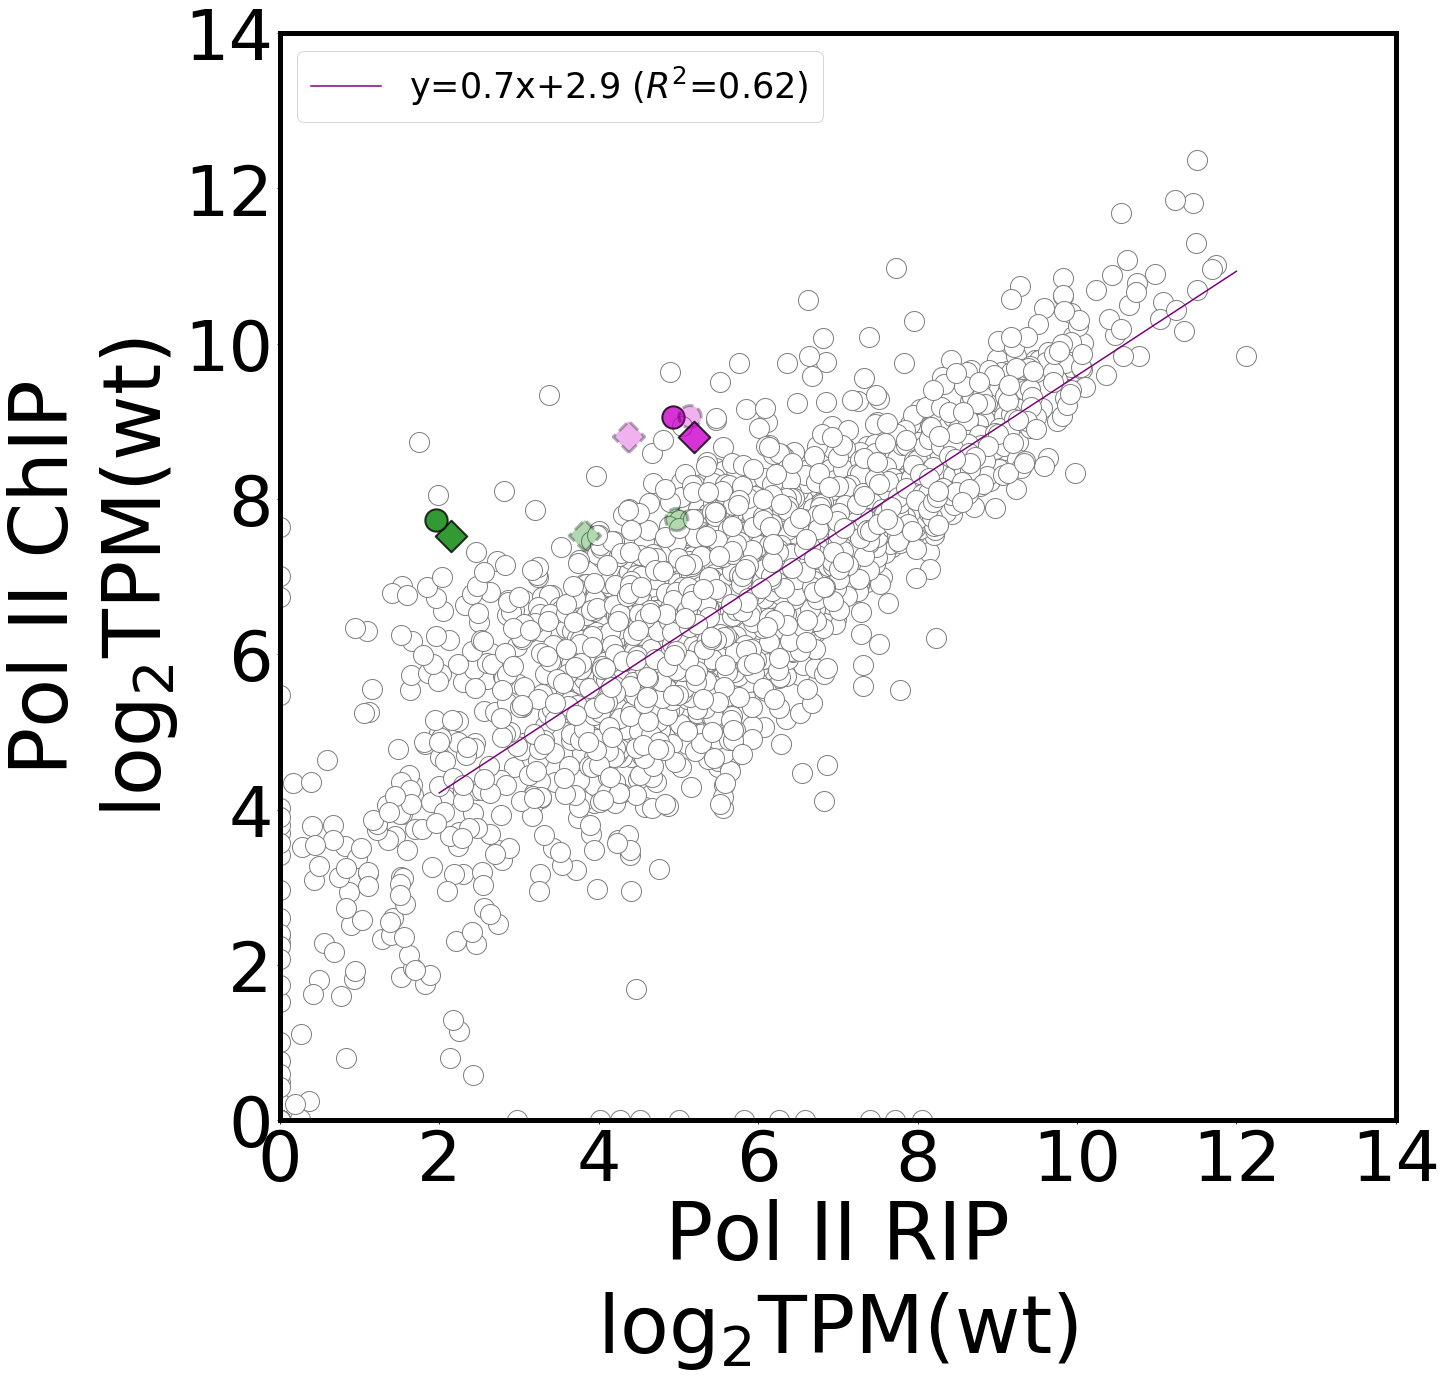

In [75]:
plot_name = 'Figure1-C_wt.png'

# path and plot
#out_path = os.path.join(out_dir, 'FigureS1-A_wt.png')
out_path = os.path.join(out_dir, plot_name)
print(out_path)

scatter_plot(
    wt_df, mutant_ids[0], mutant_ids[1],
    out_dir,
    plot_name,
    regressor=True,
    fit_intercept=True,
    #fit_intercept=False,
    annotate=False,
    #annotate=True,
    #include_mat_locus_vis = include_mat_locus_vis,
    #include_mat_locus_vis = True,
    include_mat_locus_vis = False,
    #include_rest_heterochromatic_repeats=True,
    include_rest_heterochromatic_repeats=False,
    #include_other_genes = regions_df,
    xlabel='Pol II RIP\n$\mathrm{log_2TPM(wt)}$', 
    ylabel='Pol II ChIP\n$\mathrm{log_2TPM(wt)}$', 
    ribo_color='dimgray', 
    ylim=14, xlim=14
    #ylim=None, xlim=None
)

## **Caf1d** - Pol II RIP vs Pol II ChIP -  <del>**FigureS1-A_caf1d**</del> <font color='red'> **Figure1-C_caf1d** </font>

- **Supplemental Figure S1**: Scatter plots 
    - **(A)** S2P-Pol II ChIP-seq (Pol II occupancy) data plotted over S2P-Pol II RIP-seq data (nascent RNA), displaying transcription efficiency in wild type cells. 
    - Line = regression line;  TPM = transcripts per million. Average of at least two independent samples is shown. 

#### <font color='red'> Deal with **zeros**: *Drop*? </font>
- <font color='red'> **Atention!** Removing excess of zeros due to INPUT subtraction </font>

In [76]:
caf1d_df = df

# (NOT USED) in most plots we get rid of nan's, here we set them to zero
#caf1d_df = df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#caf1d_df = df.fillna({'510_S2-RIP':0, '510_S2-ChIP':0})

# drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
# => why not fillna(0) like before, in `GXP_BoxPlots.ipynb`
# caf1d_df = df.dropna(subset = ['510_S2-RIP', '510_S2-ChIP'])

# - Should drop because of many zeros in INPUT?
#caf1d_df = df[~(df[['510_S2-RIP', '510_S2-ChIP']] == 0).any(axis=1)]

caf1d_df.head()

gene_id gene_name    type category bio_type  \
0       FP565355_region_1..2120       NaN  region   repeat   region   
1  FP565355_region_15417..15473       NaN  region   repeat   region   
2  FP565355_region_15474..15608       NaN  region   repeat   region   
3  FP565355_region_15609..16735       NaN  region   repeat   region   
4  FP565355_region_16736..16794       NaN  region   repeat   region   

   WT_S2-RIP  510_S2-RIP  WT_S2-ChIP  510_S2-ChIP  
0   1.787050    2.615811    5.767561     4.535047  
1   0.000000    0.000000    7.701085     4.739671  
2   4.910548    2.237406    5.760609     5.773420  
3   0.999985    3.871185    5.991795     4.932873  
4   0.000000    0.000000    5.702065     5.648629

In [77]:
caf1d_df.shape

(5159, 9)

- Plot gene cloud: -  **Pol II RIP** vs **Pol II ChIP** (`~ Transcript Efficiency^-1`)

In [78]:
#fig_dir = os.path.join(plots_dir, 'Figure-S1')
fig_dir = os.path.join(plots_dir, 'Figure1')

if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

In [79]:
out_dir = plots_dir
out_dir = fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure1/Figure1-C_caf1d.png


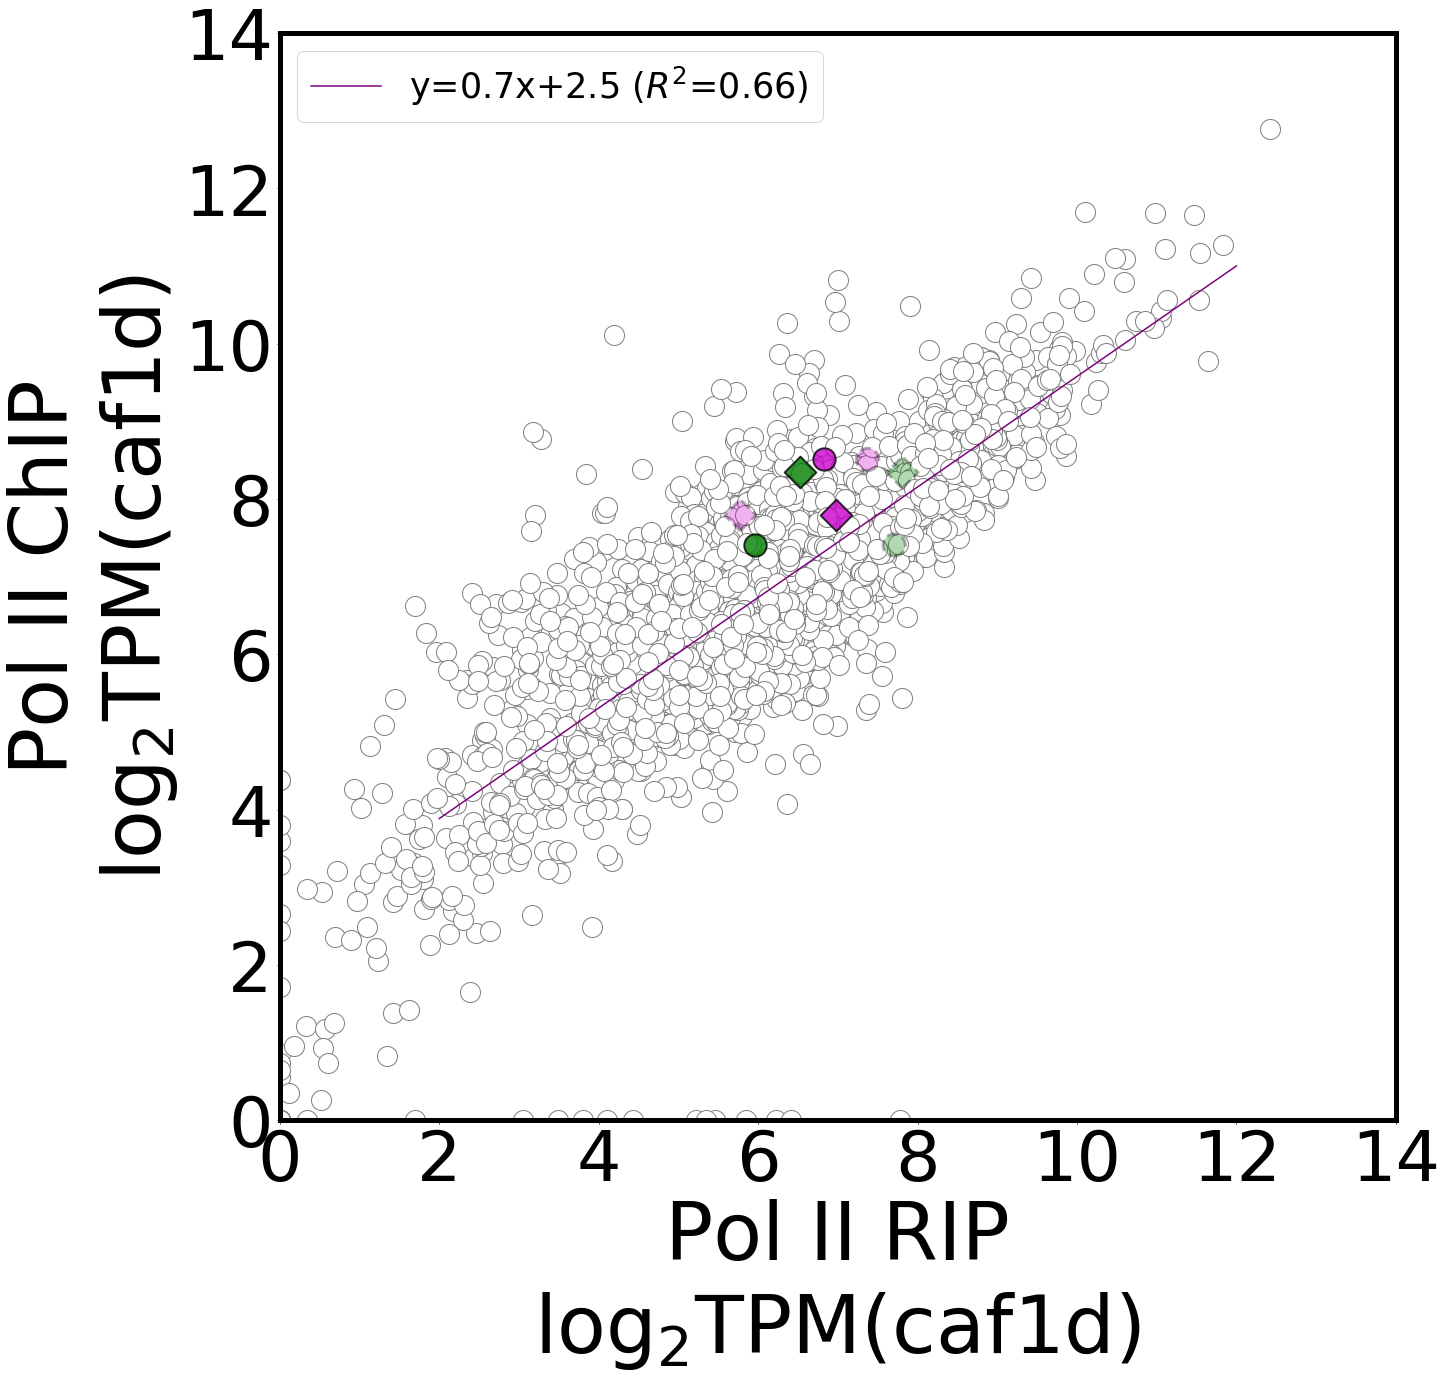

In [80]:
plot_name = 'Figure1-C_caf1d.png'

# path and plot
#out_path = os.path.join(out_dir, 'FigureS1-A_wt.png')
out_path = os.path.join(out_dir, plot_name)
print(out_path)

scatter_plot(
    caf1d_df, '510_S2-RIP', '510_S2-ChIP',
    out_dir,
    plot_name,
    regressor=True,
    fit_intercept=True,
    #fit_intercept=False,
    annotate=False,
    #annotate=True,
    #include_mat_locus_vis = include_mat_locus_vis,
    #include_mat_locus_vis = True,
    include_mat_locus_vis = False,
    #include_rest_heterochromatic_repeats=True,
    include_rest_heterochromatic_repeats=False,
    xlabel='Pol II RIP\n$\mathrm{log_2TPM(caf1d)}$', 
    ylabel='Pol II ChIP\n$\mathrm{log_2TPM(caf1d)}$', 
    ribo_color='dimgray', 
    ylim=14, xlim=14
)

---

## III. **WT H3K9me2 ChIP** vs **Mutant H3K9me2 ChIP** 

## `~H3K9me2 ChIP Occupancy fold Changes`

---

For analysis of H3K9me2 (only **Pol II ChIP fold changes** possible)

In [81]:
#h3k9me2_analysis=False
h3k9me2_analysis=True

In [82]:
h3k9me2_dir = 'h3k9me2' # use longest 3 mRNA genes
h3k9me2_dir = 'strict_mean_h3k9me2'
h3k9me2_dir = 'strict_median_h3k9me2'
#h3k9me2_dir = 'strict_q98_h3k9me2'

- Result **directories**

In [83]:
#chip_dir = os.path.join(project_data_dir, 'results/xp_data/ChIP')
chip_dir = chip_dir
if h3k9me2_analysis:
    chip_dir = os.path.join(chip_dir, h3k9me2_dir)
chip_dir

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP/strict_median_h3k9me2'

In [84]:
#ratios_dir = os.path.join(project_data_dir, 'results/Ratios')
ratios_dir = ratios_dir
if h3k9me2_analysis:
    ratios_dir = os.path.join(ratios_dir, h3k9me2_dir)
    if not os.path.exists(ratios_dir):    
        os.makedirs(ratios_dir)
ratios_dir

'/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/strict_median_h3k9me2'

In [85]:
#chip_dir = '/gcm-lfs1/pablo/data/rna_silencing/results_wo_nh-norm/xp_data/ChIP'

- **Import** ChIP data (**H3k9me2 ChIP**): 

In [86]:
chip_tpm_file = os.path.join(chip_dir, 'chip_merged_tpm.csv')
chip_tpm_file

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP/strict_median_h3k9me2/chip_merged_tpm.csv'

In [87]:
chip_df = pd.read_csv(chip_tpm_file, sep='\t')
#chip_df = pd.read_csv(, sep='\t')
chip_df.head()

gene_id gene_name  length    type category bio_type  \
0       FP565355_region_1..2120       NaN    2120  region   repeat   region   
1  FP565355_region_15417..15473       NaN      57  region   repeat   region   
2  FP565355_region_15474..15608       NaN     135  region   repeat   region   
3  FP565355_region_15609..16735       NaN    1127  region   repeat   region   
4  FP565355_region_16736..16794       NaN      59  region   repeat   region   

   301_H3K9me2  302_H3K9me2  324_H3K9me2   491_H3K9me2   504_H3K9me2  \
0   263.023564   474.799102  6658.084270  10510.037889   3316.432571   
1  1286.425925  1846.645656  2890.551819   3467.732647   7974.489816   
2  1602.876963  1947.305494  9313.746475  15792.664793  15054.693081   
3   831.274146   540.741210  3591.963817  12305.803911   2429.703569   
4   125.890239    92.541567  6071.700954   5800.720913  10020.307834   

    510_H3K9me2   530_H3K9me2   638_H3K9me2    WT_H3K9me2  
0   6323.109757   4602.274093   8851.184179   3414.403040  
1   8226.554406   5201.300617  17343.139492   3893.408481  
2  16605.754212  11327.405719  34115.366780  10733.763078  
3   6090.881075   4811.419254  13517.689815   3922.697032  
4   4991.582665   4661.476587  22531.882022   2253.206610

In [88]:
chip_df.shape

(7018, 15)

- Adjust for **number of copies** of each repeat:

In [89]:
#chip_df['WT_S2-ChIP'] = chip_df[['gene_id','WT_S2-ChIP']].apply(lambda x: scale_repeats(x, n_repeats_dict), axis=1)

In [90]:
## test if one sample is biasing whole analysis.
##chip_df = pd.read_csv(os.path.join(chip_dir, 'chip_pombe_tpm_matrix.csv'), sep='\t')
#chip_df.loc[chip_df['gene_id'].str.contains('dg|dh|SPAC212.11|SPAC212.10'), chip_df.columns.str.contains('WT|gene_id|gene_name')]

- Get **sample columns** for filtering `NA`s properly:

In [91]:
sample_cols = [ss for ss in chip_df.columns.tolist() if ss not in long_header]
len(sample_cols)
#sample_cols

9

#### <font color='red'> Deal with **NAs**: *Drop* or *fill with zeros?* </font>
- <font color='red'> `NaN's` originated from zero counts: **fill with zeros** </font>
- <font color='red'> In both `rna_merged_tpm.csv` and `chip_merged_tpm.csv`, it should already have been taken care of! </font> 
    - <font color='red'> **NOT for `simulated-data`!** </font> 

In [92]:
# (NOT USED)
# => NAs originated from zero counts: fill with zeros
#chip_df = chip_df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#chip_df = chip_df.fillna({kk:0 for kk in sample_cols})

# (NOT USED) drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
#chip_df = chip_df.dropna(subset = sample_cols) 
#chip_df = chip_df.dropna(0)

In [93]:
# no surprises!
# => there should not be NAs in sample columns (with counts)
assert not chip_df[sample_cols].isnull().values.any()

* **Log-transform** and filter for **Heterochromatic** and **Protein coding** (mRNA) genes

In [94]:
# log transformed counts will be used to visualize scatterplot
# => compute log(1+x) to avoid issues with zero counts
#chip_df = to_log2_tpm(chip_df) ## default shift = 1
chip_df = to_log2_tpm(chip_df, gene_id_col='gene_id', shift=1)

#chip_df = chip_df[['gene-name', 'type', 'category', 'WT_ChIP']]
#chip_df = chip_df[['gene_id', 'gene_name', 'type', 'category', 'bio_type', 'WT_S2-ChIP']]

# Keep only Heterochromatic genes and  protein coding genes (need to change for gff_v2)
#chip_df = chip_df[(chip_df['type'] == 'gene') | (chip_df['category'] == 'repeat')]
chip_df = chip_df[(chip_df['bio_type'] == 'mRNA') | (chip_df['category'] == 'repeat')]

chip_df.head()

gene_id gene_name  length    type category bio_type  \
0       FP565355_region_1..2120       NaN    2120  region   repeat   region   
1  FP565355_region_15417..15473       NaN      57  region   repeat   region   
2  FP565355_region_15474..15608       NaN     135  region   repeat   region   
3  FP565355_region_15609..16735       NaN    1127  region   repeat   region   
4  FP565355_region_16736..16794       NaN      59  region   repeat   region   

   301_H3K9me2  302_H3K9me2  324_H3K9me2  491_H3K9me2  504_H3K9me2  \
0     8.044523     8.894209    12.701108    13.359618    11.695851   
1    10.330274    10.851472    11.497628    11.760193    12.961357   
2    10.647348    10.928004    13.185301    13.947058    13.878022   
3     9.700915     9.081460    11.810959    13.587169    11.247158   
4     6.987437     6.547536    12.568123    12.502265    13.290783   

   510_H3K9me2  530_H3K9me2  638_H3K9me2  WT_H3K9me2  
0    12.626647    12.168445    13.111818   11.737840  
1    13.006248    12.344934    14.082161   11.927188  
2    14.019483    13.467657    15.058176   13.390003  
3    12.572672    12.232547    13.722668   11.937998  
4    12.285571    12.186881    14.459744   11.138404

In [95]:
chip_df.shape

(5159, 15)

#### <font color='red'> Deal with **zeros**: *Drop*? </font>
- <font color='red'> **Atention!** Removing excess of zeros due to INPUT subtraction </font>

In [96]:
df = chip_df

## drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
#df = chip_df.dropna()
#df = chip_df.dropna(subset = sample_cols) ## why not fillna(0) like before, in GXP_BoxPlots.ipynb
#df = chip_df.dropna(subset = ['WT_H3K9me2', '301_H3K9me2'])

## Should drop because of many zeros in INPUT?
#df = df[~(df[['WT_H3K9me2', '301_H3K9me2']] == 0).any(axis=1)]

df.head()

gene_id gene_name  length    type category bio_type  \
0       FP565355_region_1..2120       NaN    2120  region   repeat   region   
1  FP565355_region_15417..15473       NaN      57  region   repeat   region   
2  FP565355_region_15474..15608       NaN     135  region   repeat   region   
3  FP565355_region_15609..16735       NaN    1127  region   repeat   region   
4  FP565355_region_16736..16794       NaN      59  region   repeat   region   

   301_H3K9me2  302_H3K9me2  324_H3K9me2  491_H3K9me2  504_H3K9me2  \
0     8.044523     8.894209    12.701108    13.359618    11.695851   
1    10.330274    10.851472    11.497628    11.760193    12.961357   
2    10.647348    10.928004    13.185301    13.947058    13.878022   
3     9.700915     9.081460    11.810959    13.587169    11.247158   
4     6.987437     6.547536    12.568123    12.502265    13.290783   

   510_H3K9me2  530_H3K9me2  638_H3K9me2  WT_H3K9me2  
0    12.626647    12.168445    13.111818   11.737840  
1    13.006248    12.344934    14.082161   11.927188  
2    14.019483    13.467657    15.058176   13.390003  
3    12.572672    12.232547    13.722668   11.937998  
4    12.285571    12.186881    14.459744   11.138404

In [97]:
df.shape

(5159, 15)

## H3K9me2 ChIP: **WT** vs **Mutant** - **FigureS1-C**

- **Supplemental Figure S1**: Scatter plots 
    - **(A)** S2P-Pol II ChIP-seq (Pol II occupancy) data plotted over S2P-Pol II RIP-seq data (nascent RNA), displaying transcription efficiency in wild type cells. 
    - Line = regression line;  TPM = transcripts per million. Average of at least two independent samples is shown. 

- Plot gene cloud: **H3K9me2 - ChIP WT** vs **Mutant** (`~H3K9me2 ChIP Occupancy fold Changes`)

In [98]:
fig_dir = os.path.join(plots_dir, 'Figure-S1/h3k9me2')
if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

In [99]:
out_dir = plots_dir
out_dir = fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S1/h3k9me2/FigureS1-C_swi6d.png


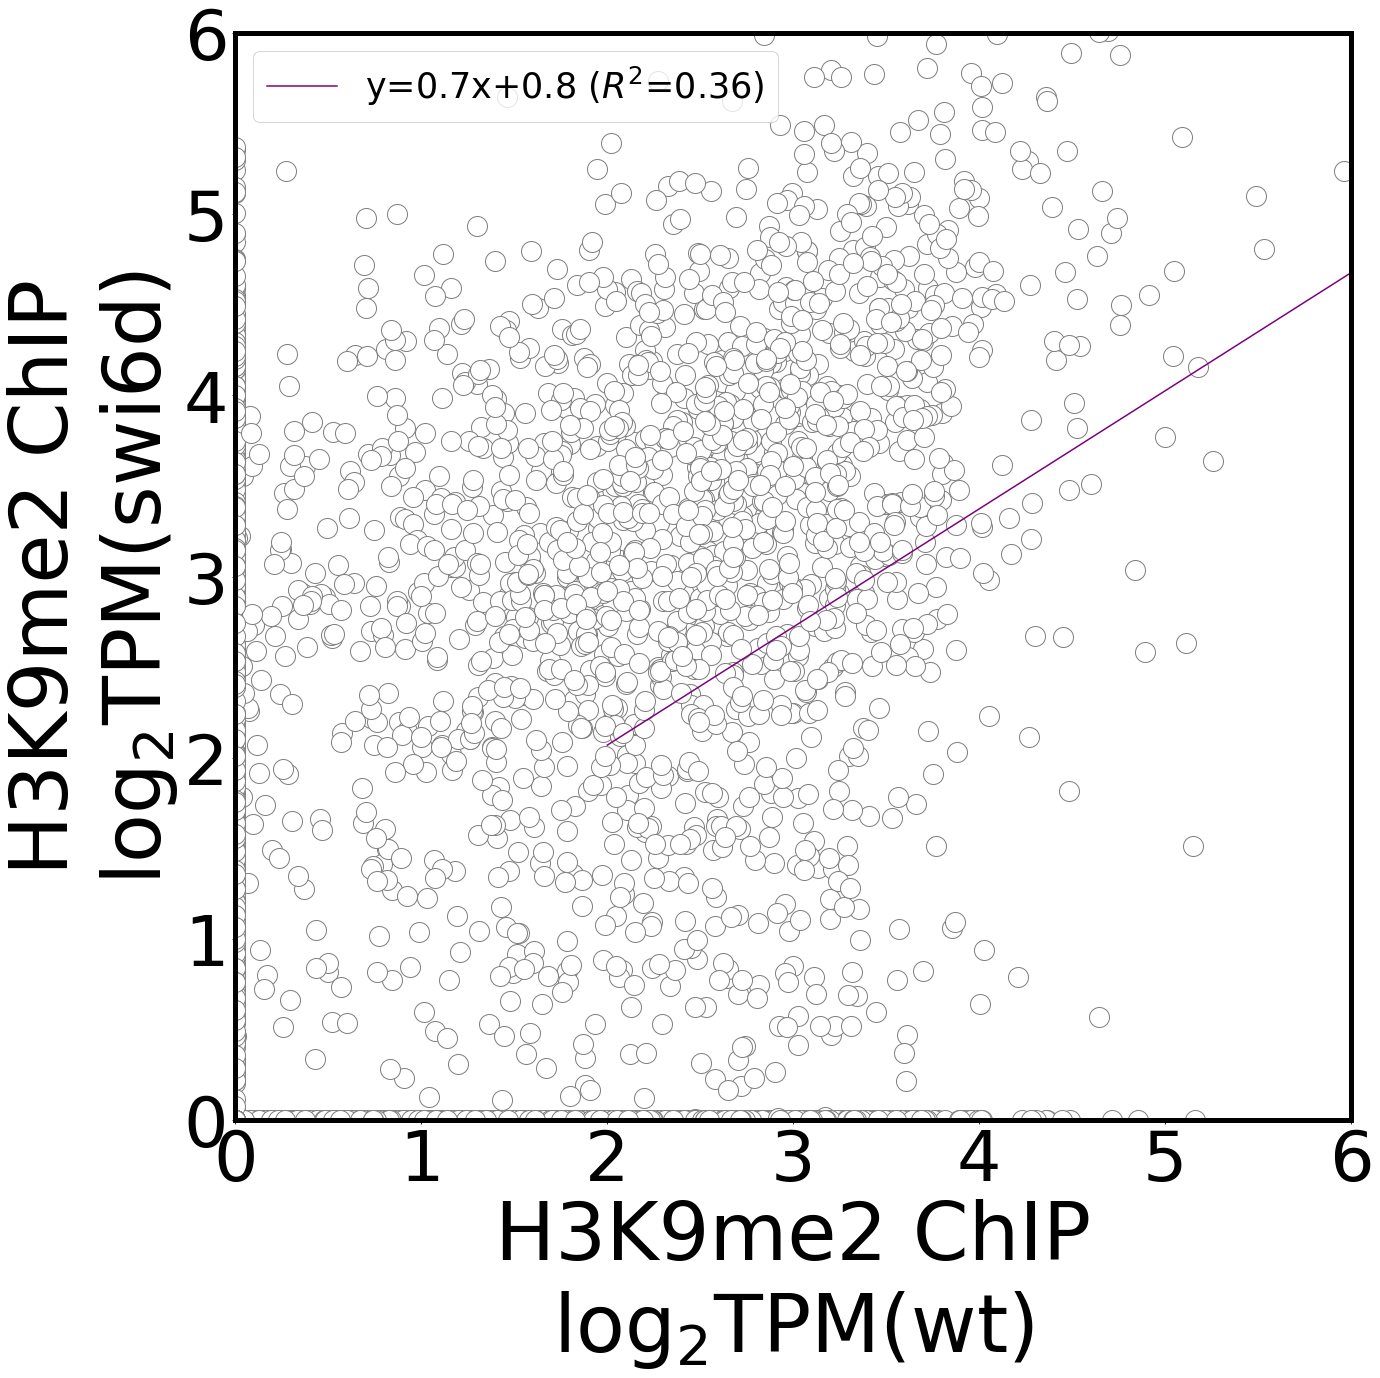

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S1/h3k9me2/FigureS1-C_clr3d.png


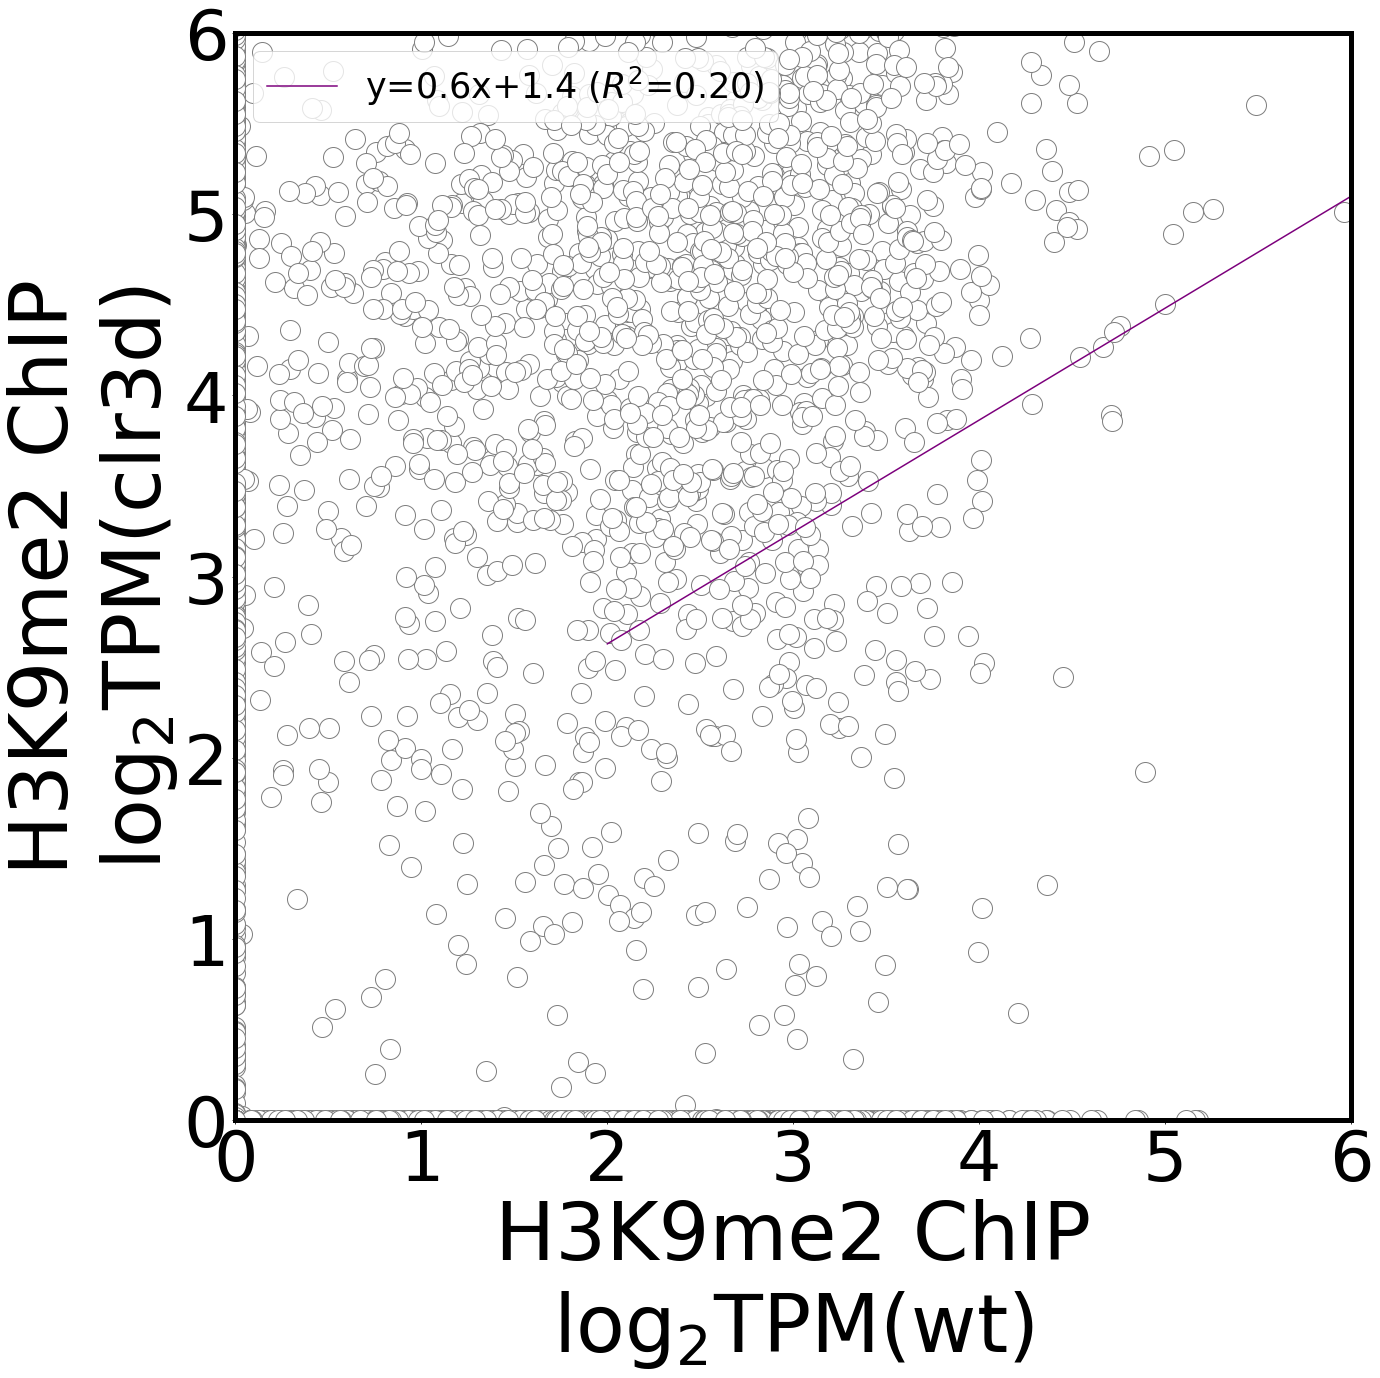

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S1/h3k9me2/FigureS1-C_chp2d.png


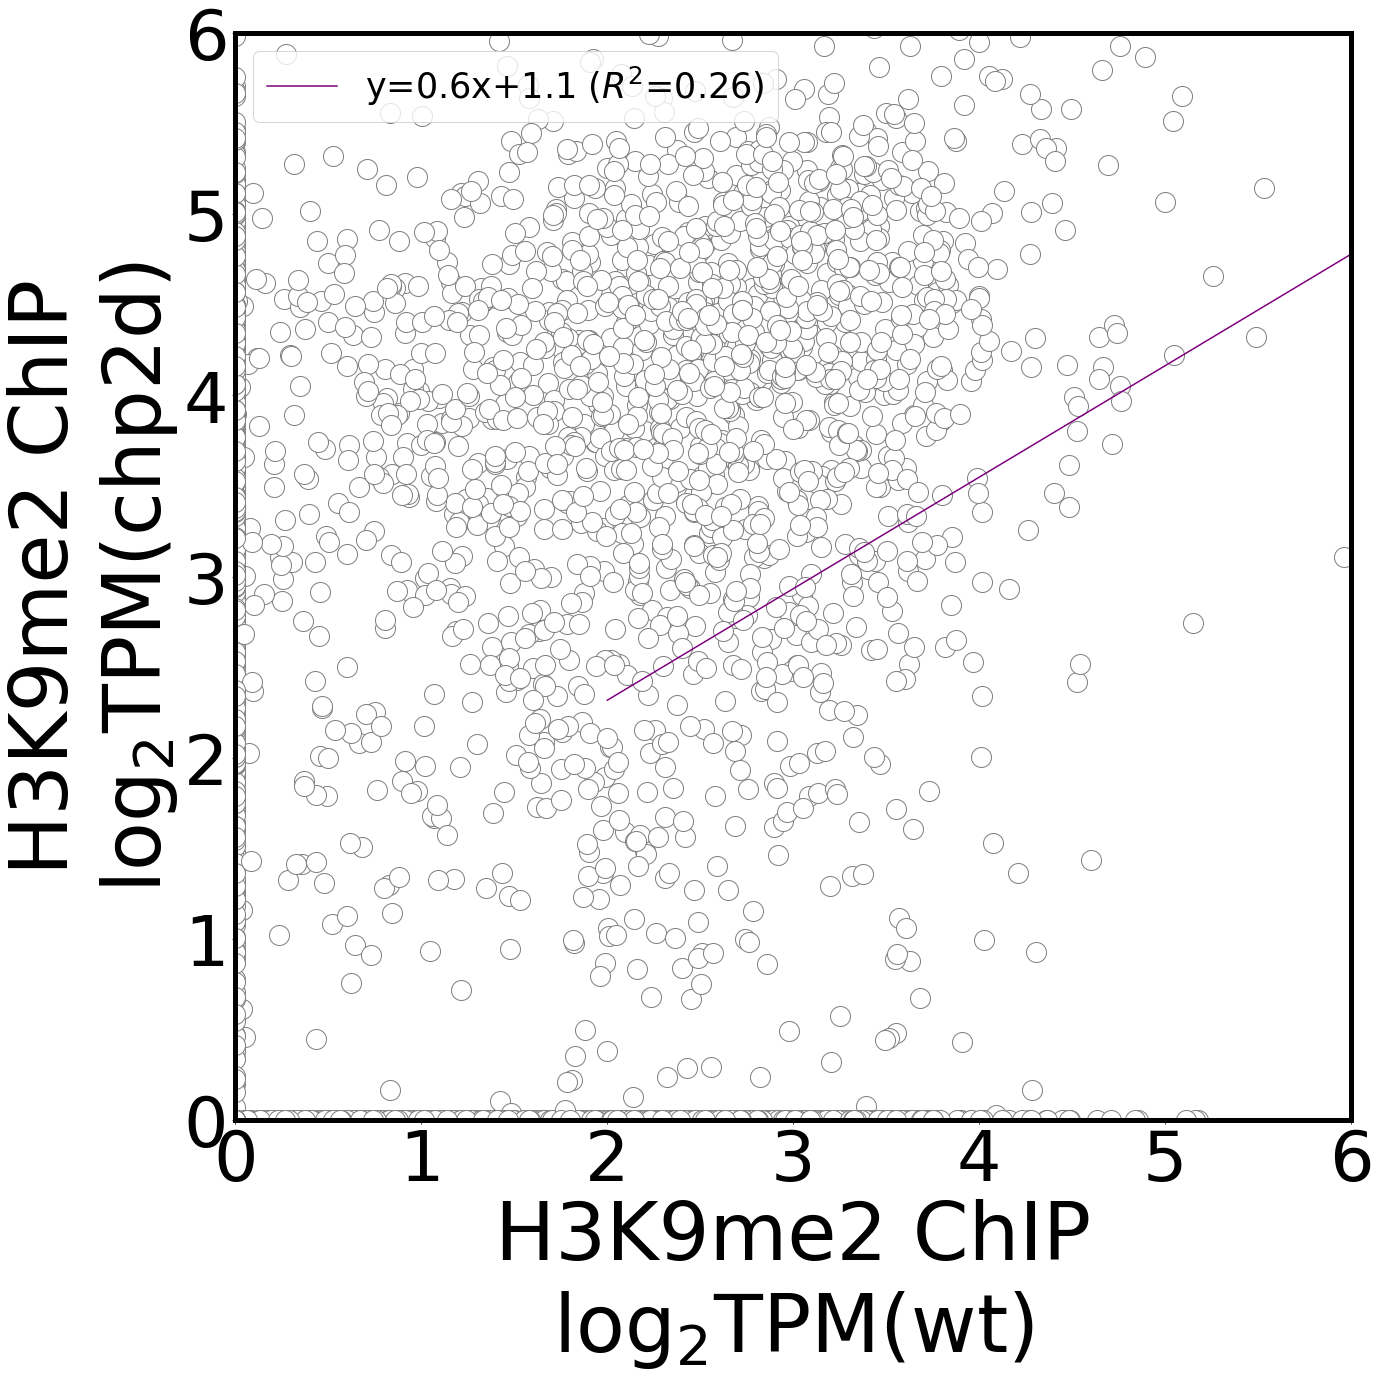

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S1/h3k9me2/FigureS1-C_mit1d.png


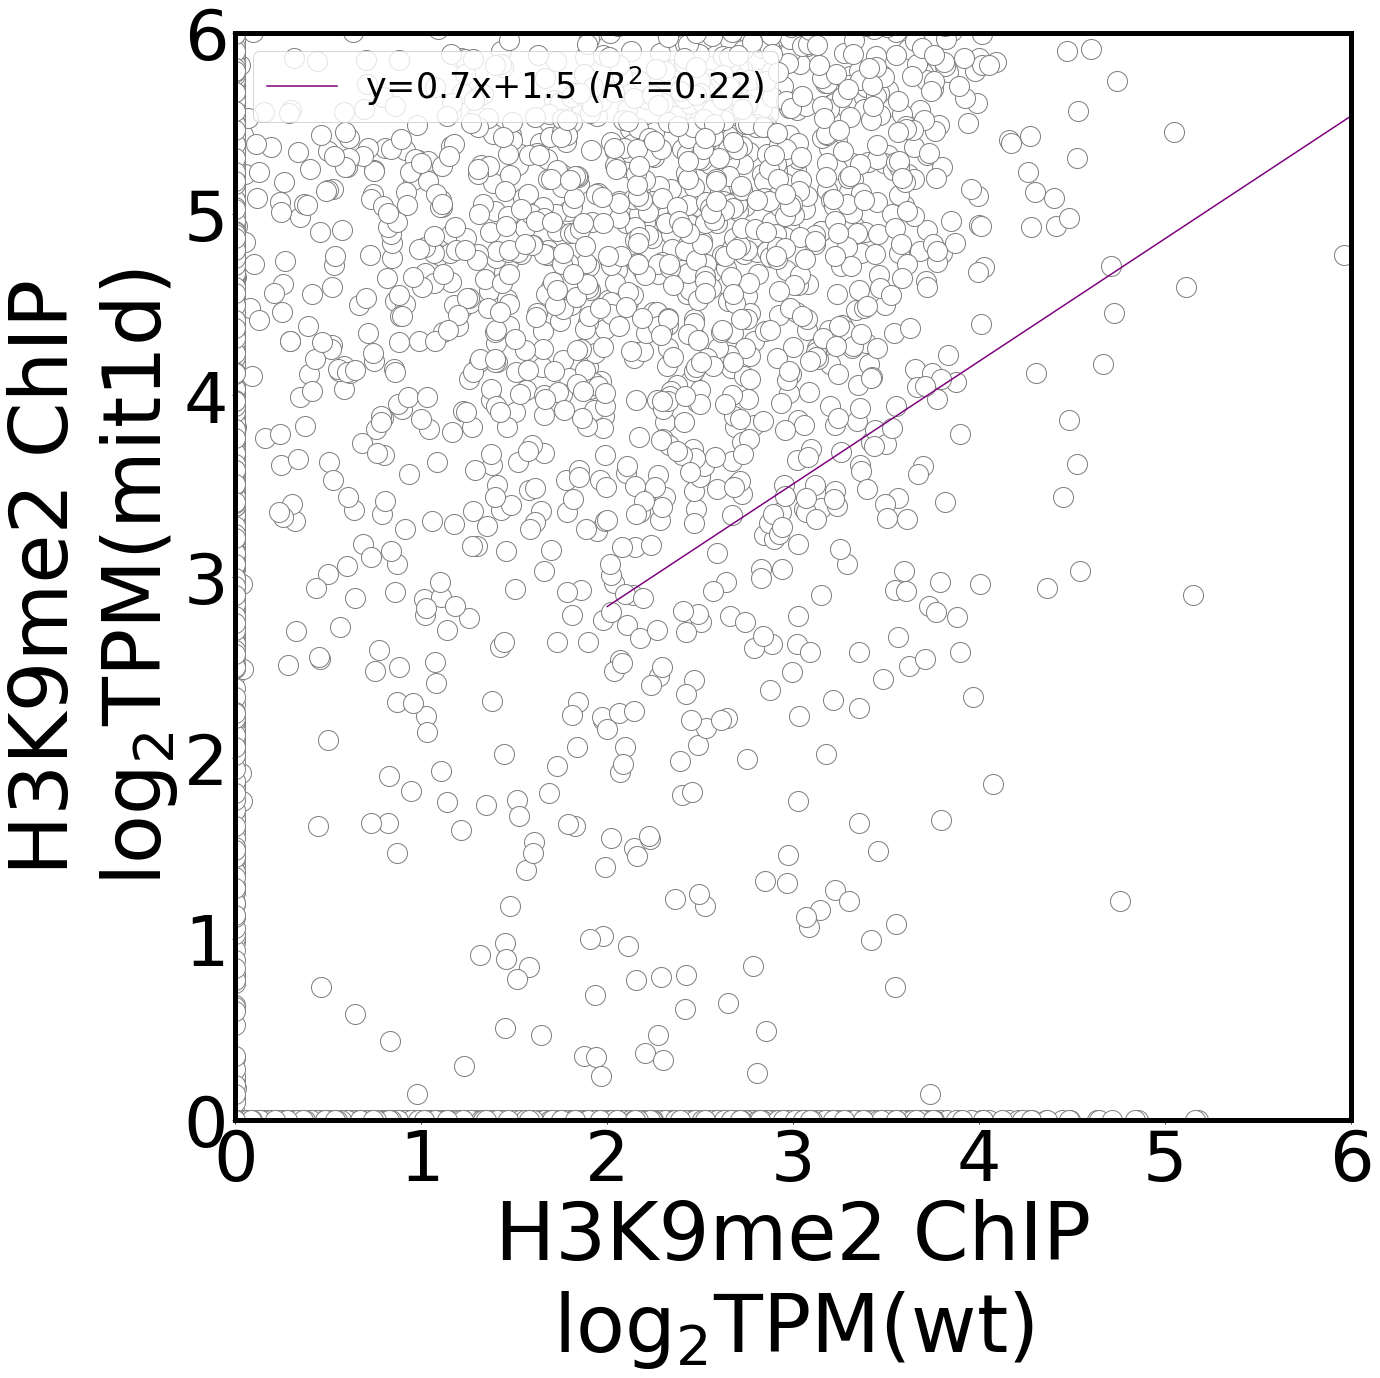

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S1/h3k9me2/FigureS1-C_rrp6d.png


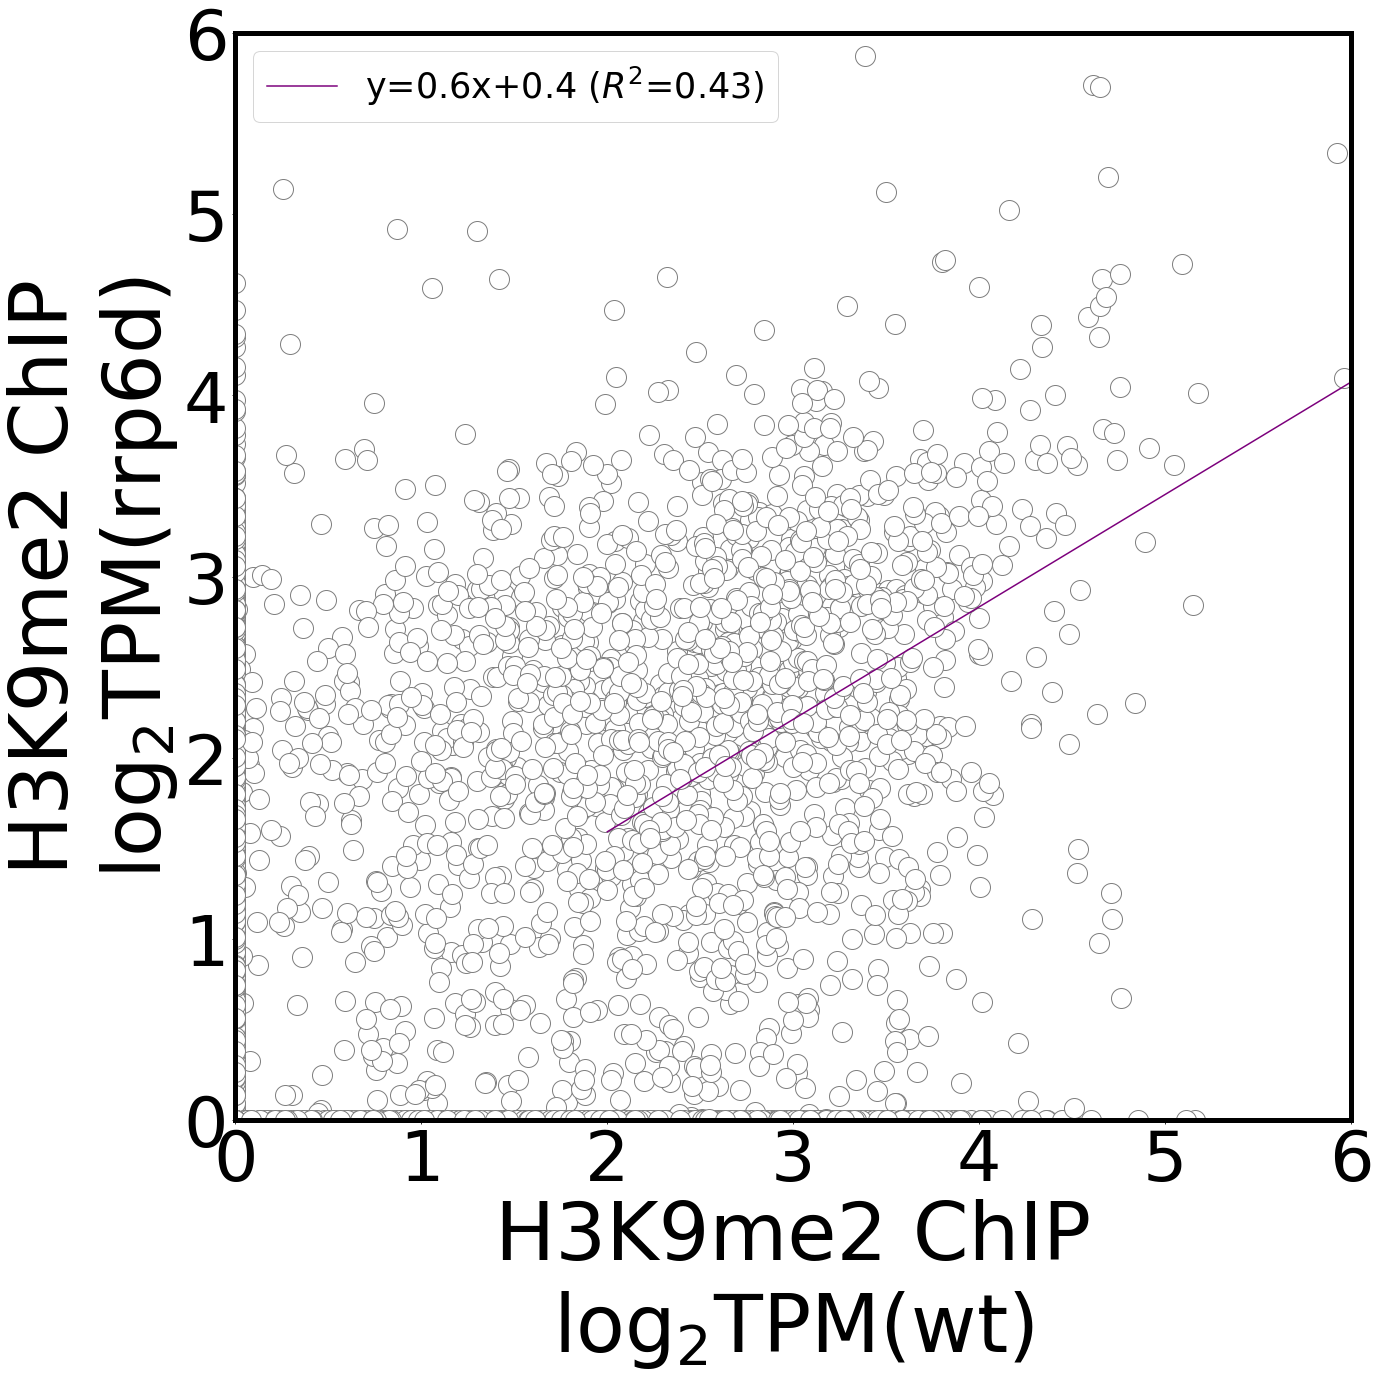

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S1/h3k9me2/FigureS1-C_caf1d.png


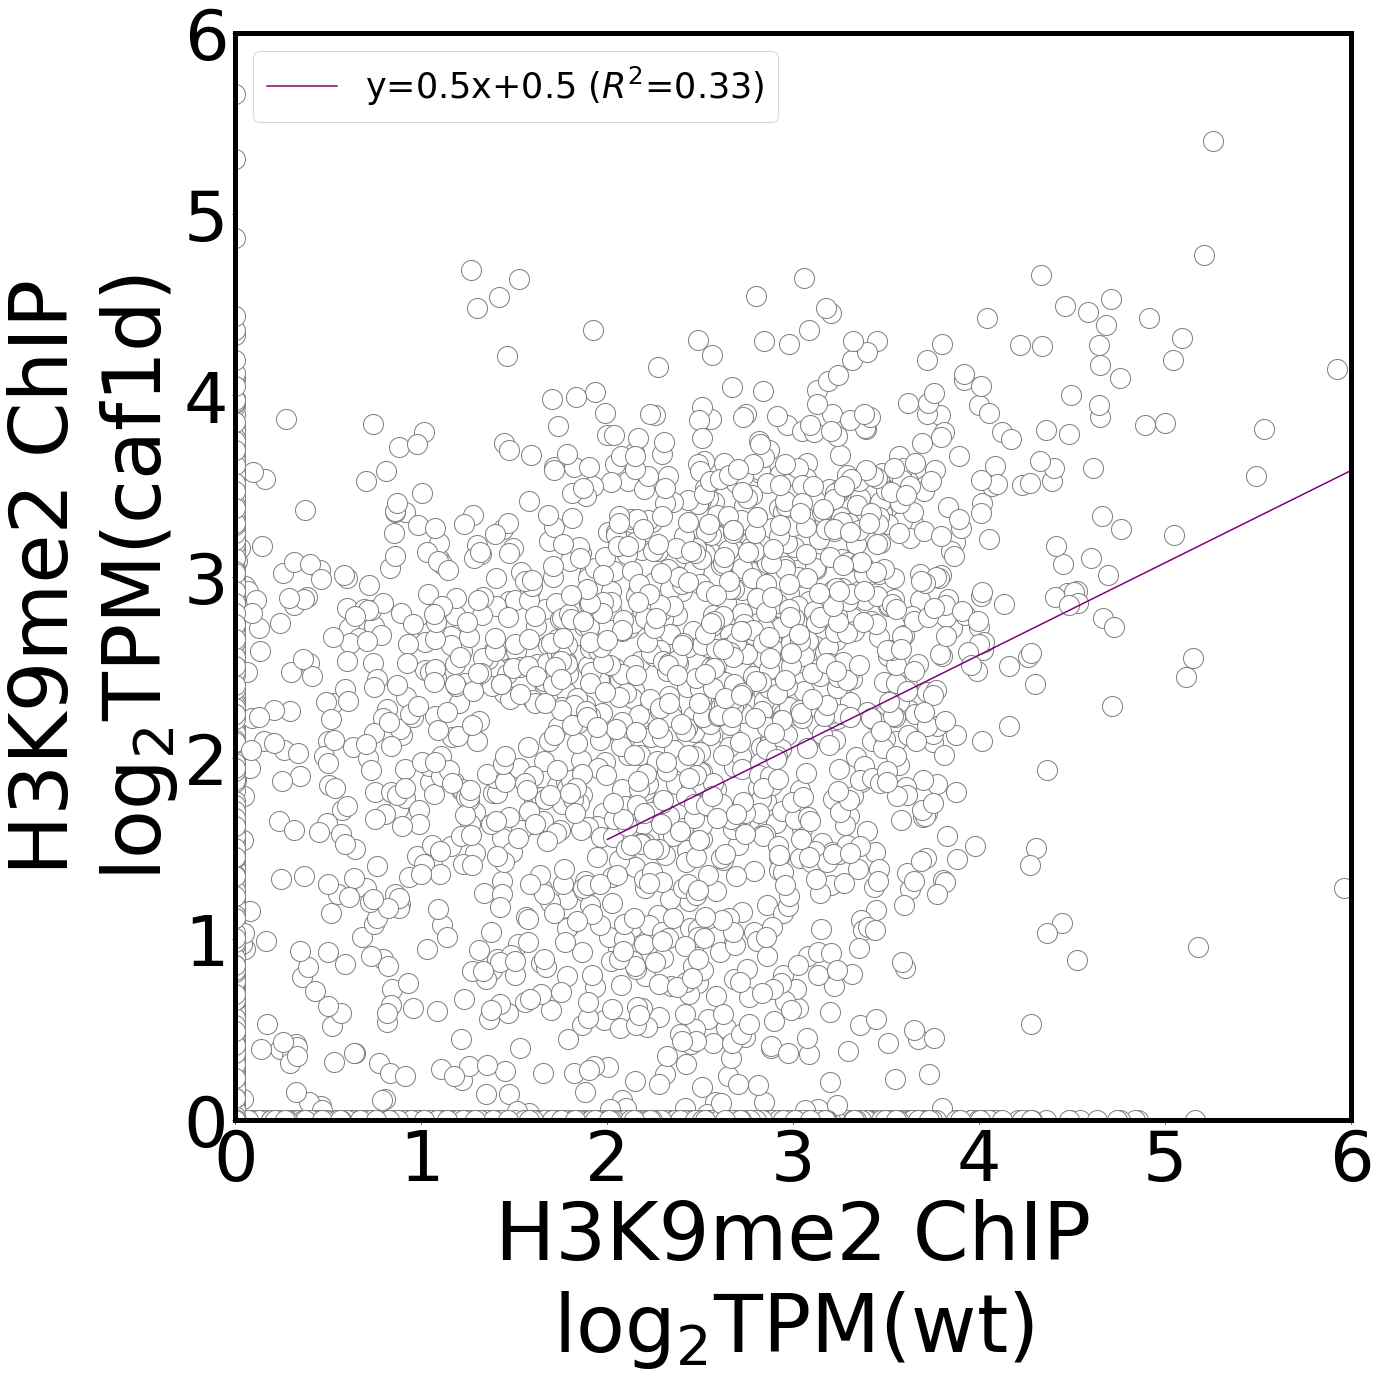

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S1/h3k9me2/FigureS1-C_exo2d.png


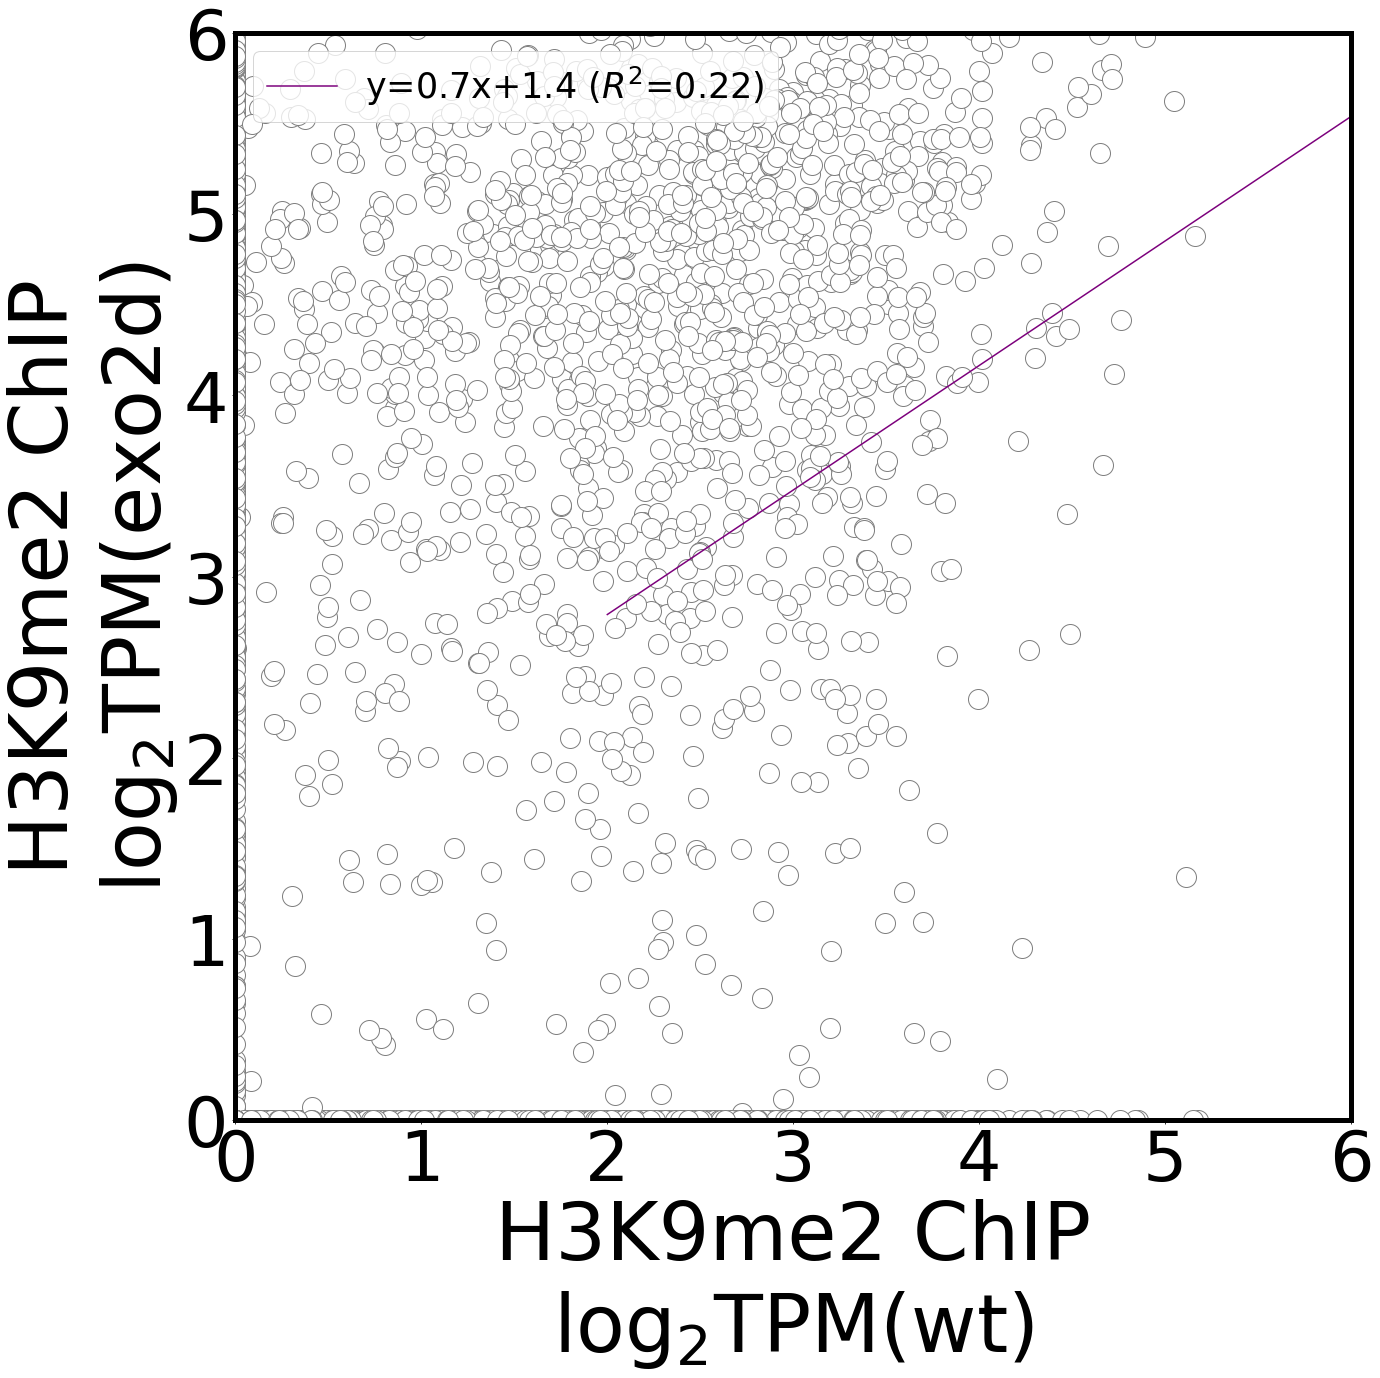

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S1/h3k9me2/FigureS1-C_ago1d.png


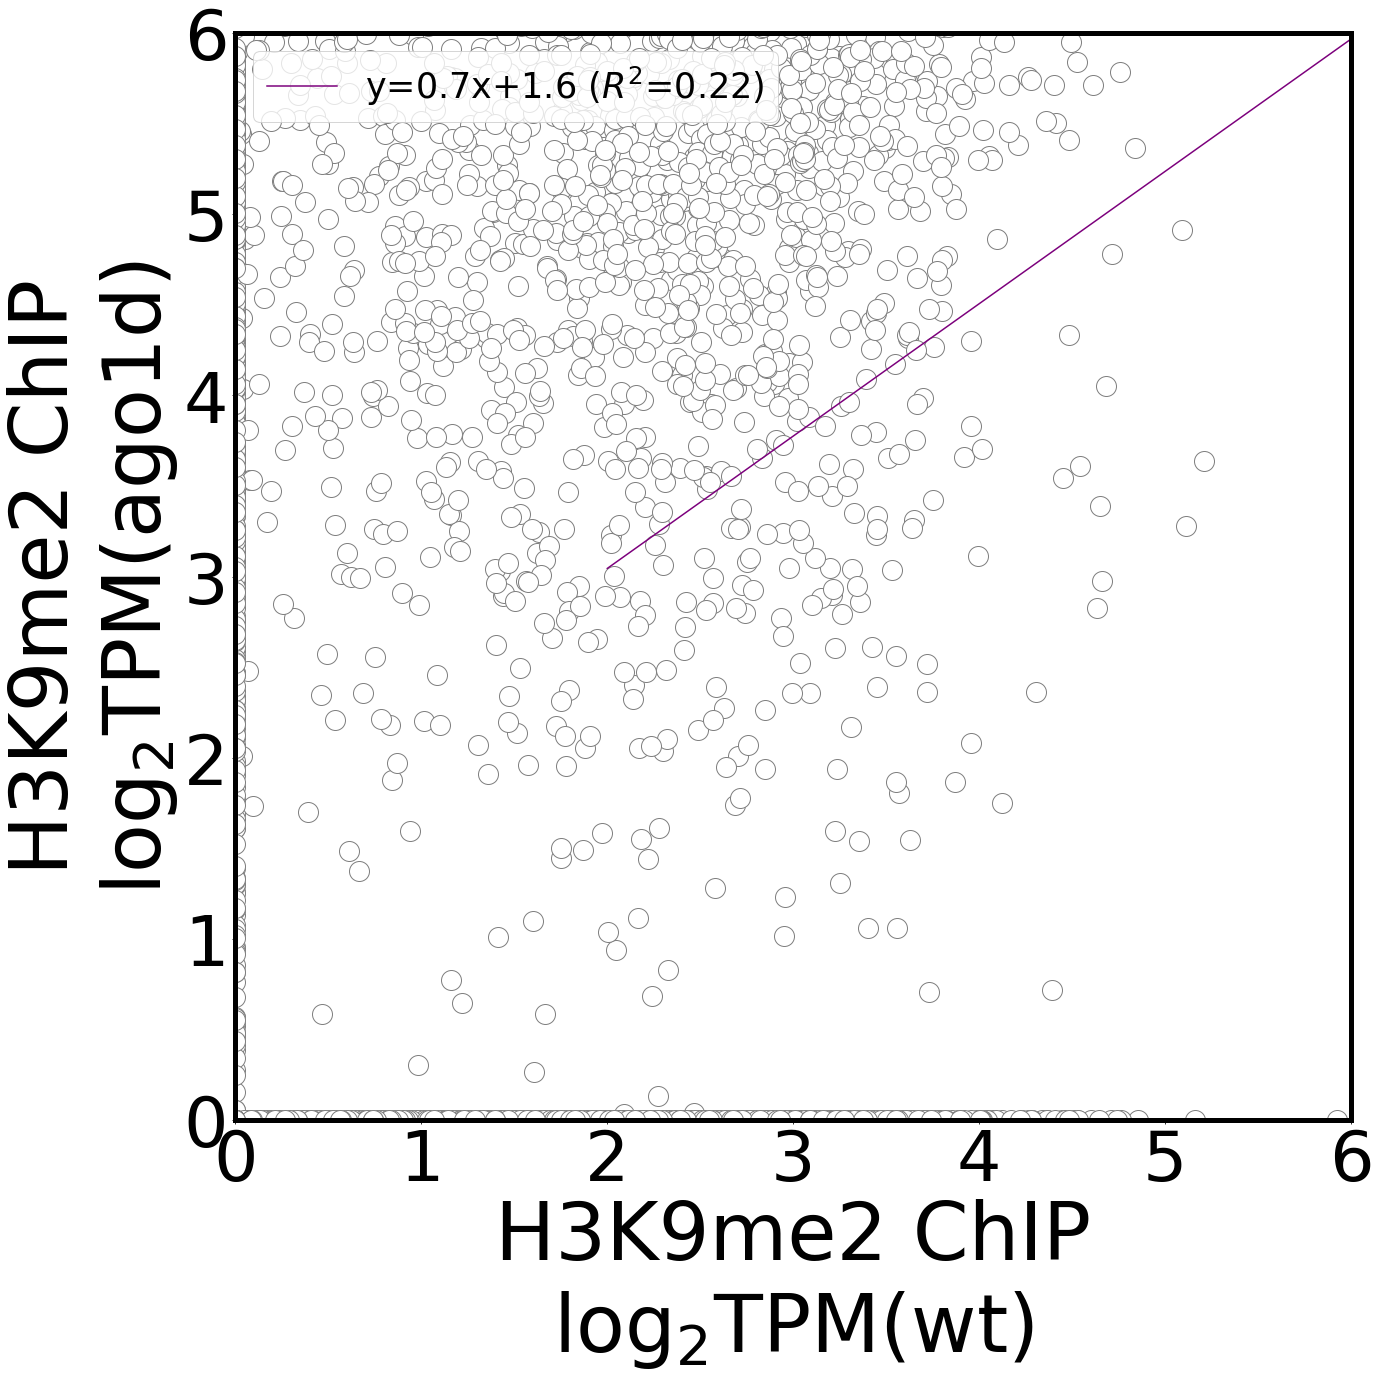

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure-S1/h3k9me2/FigureS1-C_wt.png


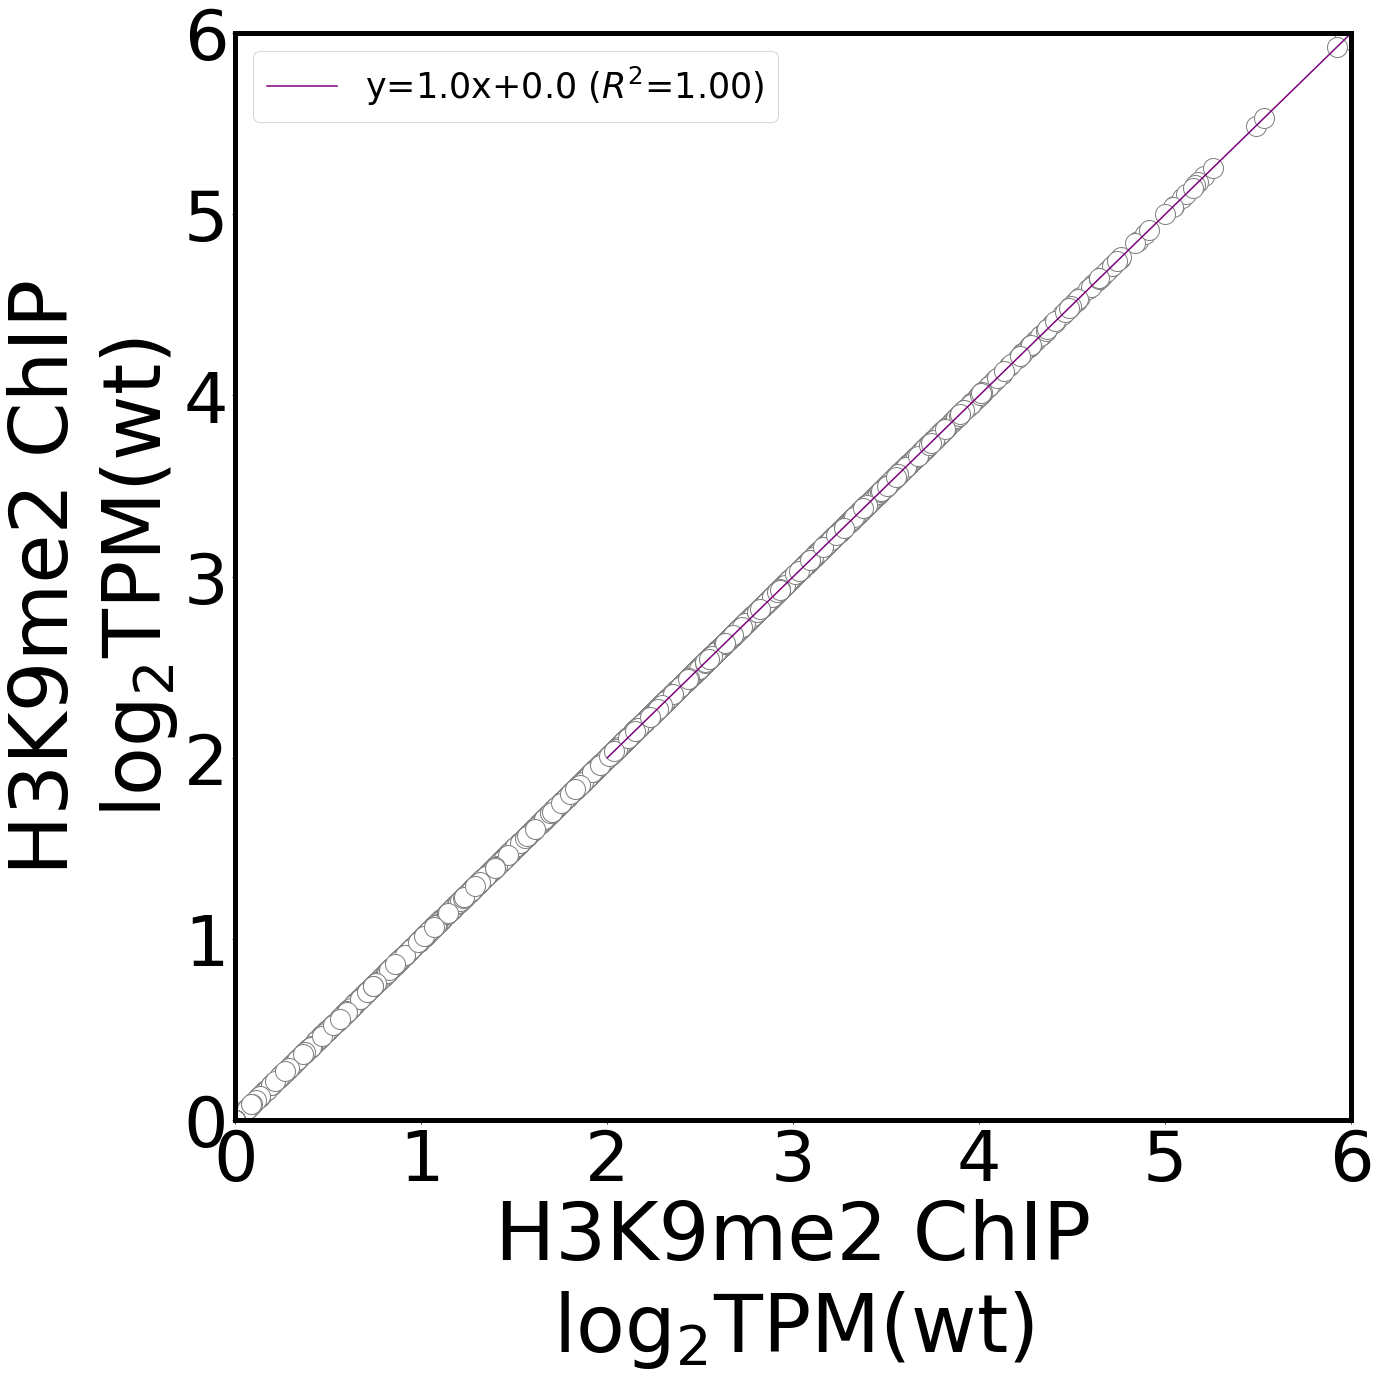

In [100]:
#for mm in [sample_cols[0]]:
for mm in sample_cols:

    mut_name = mut_dict[mm.split('_')[0]]
    
    print(os.path.join(out_dir, 'FigureS1-C_' + mut_name + '.png'))
    
    scatter_plot(
        df, 'WT_H3K9me2', mm, 
        out_dir,
        'FigureS1-C_' + mut_name + '.png',
        regressor=True,
        fit_intercept=True,
        #fit_intercept=False,
        annotate=False,
        #annotate=True,
        #include_mat_locus_vis = include_mat_locus_vis,
        #include_mat_locus_vis = True,
        include_mat_locus_vis = False,
        #include_rest_heterochromatic_repeats=True,
        include_rest_heterochromatic_repeats=False,
        xlabel='H3K9me2 ChIP\n$\mathrm{log_2TPM(wt)}$', 
        ylabel='H3K9me2 ChIP\n$\mathrm{log_2TPM(' + mut_name + ')}$', 
        ribo_color='dimgray', 
        #ylim=14, xlim=14)
        ylim=6, xlim=6
    )